# House price prediction project

# Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [3]:
pd.set_option('display.max_columns', None)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [4]:
#checking the data dimensions
df.shape

(1168, 81)

In [5]:
#checking the columns in the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Features:


    MSSubClass: Identifies the type of dwelling involved in the sale
    
    MSZoning: Identifies the general zoning classification of the sale

    LotFrontage: Linear feet of street connected to property

    LotArea: Lot size in square feet

    Street: Type of road access to property

    Alley: Type of alley access to property

    LotShape: General shape of property
    
    LandContour: Flatness of the property

    Utilities: Type of utilities available

    LotConfig: Lot configuration

    LandSlope: Slope of property

    Neighborhood: Physical locations within Ames city limits

    Condition1: Proximity to various conditions

    Condition2: Proximity to various conditions (if more than one is present)

    BldgType: Type of dwelling

    HouseStyle: Style of dwelling
    
    OverallQual: Rates the overall material and finish of the house

    OverallCond: Rates the overall condition of the house


    YearBuilt: Original construction date

    YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

    RoofStyle: Type of roof
    
    RoofMatl: Roof material

    Exterior1st: Exterior covering on house

    Exterior2nd: Exterior covering on house (if more than one material)

    MasVnrType: Masonry veneer type

    MasVnrArea: Masonry veneer area in square feet

    ExterQual: Evaluates the quality of the material on the exterior 

    ExterCond: Evaluates the present condition of the material on the exterior

    Foundation: Type of foundation

    BsmtQual: Evaluates the height of the basement

    BsmtCond: Evaluates the general condition of the basement

    BsmtExposure: Refers to walkout or garden level walls

    BsmtFinType1: Rating of basement finished area

    BsmtFinSF1: Type 1 finished square feet

    BsmtFinType2: Rating of basement finished area (if multiple types)
    
    BsmtFinSF2: Type 2 finished square feet

    BsmtUnfSF: Unfinished square feet of basement area

    TotalBsmtSF: Total square feet of basement area

    Heating: Type of heating

    HeatingQC: Heating quality and condition

    CentralAir: Central air conditioning

    Electrical: Electrical system

    1stFlrSF: First Floor square feet

    2ndFlrSF: Second floor square feet

    LowQualFinSF: Low quality finished square feet (all floors)

    GrLivArea: Above grade (ground) living area square feet

    BsmtFullBath: Basement full bathrooms

    BsmtHalfBath: Basement half bathrooms

    FullBath: Full bathrooms above grade

    HalfBath: Half baths above grade

    Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

    Kitchen: Kitchens above grade

    KitchenQual: Kitchen quality

    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

    Functional: Home functionality (Assume typical unless deductions are warranted)

    Fireplaces: Number of fireplaces

    FireplaceQu: Fireplace quality

    GarageType: Garage location
    
    GarageYrBlt: Year garage was built

    GarageFinish: Interior finish of the garage

    GarageCars: Size of garage in car capacity

    GarageArea: Size of garage in square feet

    GarageQual: Garage quality

    GarageCond: Garage condition

    PavedDrive: Paved driveway

    WoodDeckSF: Wood deck area in square feet

    OpenPorchSF: Open porch area in square feet

    EnclosedPorch: Enclosed porch area in square feet

    3SsnPorch: Three season porch area in square feet

    ScreenPorch: Screen porch area in square feet

    PoolArea: Pool area in square feet

    PoolQC: Pool quality

    Fence: Fence quality

    MiscFeature: Miscellaneous feature not covered in other categories

    MiscVal: $Value of miscellaneous feature

       MoSold: Month Sold (MM)

        YrSold: Year Sold (YYYY)
    
        SaleType: Type of sale

        SaleCondition: Condition of sale

In [6]:
#checking data types of columns
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Observation:

1. There are two types of data present in the dataset categorical and numerical.

In [7]:
#checking the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

# Exploring categorical columns

In [8]:
#exploring categorical columns
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
*******************************************************************************************************


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
*******************************************************************************************************


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64
*******************************************************************************************************


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
*******************************************************************************************************


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
*********************************************

SaleType : ['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64
*******************************************************************************************************


SaleCondition : ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64
*******************************************************************************************************




Observation:

1. There is only one unique value present in utilities column so we will be dropping this column.

2. In categorical columns there are missing values present in coumns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Handling missing values

In [9]:
#checking if missing values present
df.isnull().values.any()

True

Observation:

There are missing values present in our dataset.

In [10]:
#checking the missing values of top 30 columns
df.isnull().sum().sort_values(ascending = False).head(30)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
OverallCond        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
SalePrice          0
OverallQual        0
dtype: int64

Observation:

There are 1161 missing values in the column PoolQC, 1124 in MiscFeature, 11091 in Alley, 931 in Fence, 551 in FireplaceQu,214 in LotFrontage, 64 each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31 in BsmtExposure and BsmtFinType2, 30 in BsmtCond and BsmtQual, 7 in MasVnrArea and MasVnrType present in our dataset.

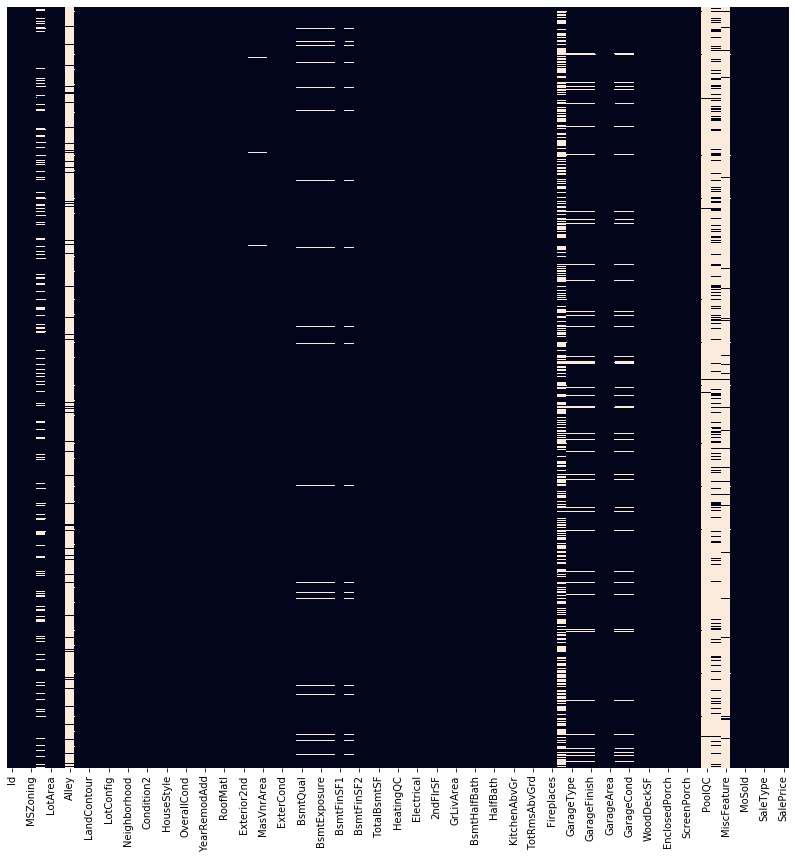

In [11]:
#Visualizing missing values through heatmap
plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

For better understanding we are viewing missing values with the help of visualization through heatmap.

In [12]:
#checking the percentage of missing values of each column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

Observation:

Majority of data is missing in the columns PoolQC, MiscFeature, Alley and Fence

In [13]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
df[columns] = df[columns].fillna('NA')

In [14]:
#filling missing values in MasVnrType with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [15]:
#filling missing values in GarageYrBlt with 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')

In [16]:
#Imputing the missing values with their median
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

# Summary statistics


In [17]:
#checking out the statistical summary of our dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027   
std       1.124343    30.145255     20.785185   182.218483   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000       0.00

Observation:

1. Maximum standard deviation of 8957.44 is observed in LotArea column.

2. Maximum SalePrice of a house observed is 755000 and minimum is 34900.

3. In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

4. In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

5. In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

# To check the correlation

In [18]:
#checking correlation
df_cor=df.corr()
df_cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006165 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336234 -0.124151     0.070462   
LotFrontage   -0.006165   -0.336234     1.000000  0.296790     0.229981   
LotArea       -0.029212   -0.124151     0.296790  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229981  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047851  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112000  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.089513  0.027228     0.555945   
MasVnrArea    -0.061397    0.028215     0.188273  0.120192     0.403985   
BsmtFinSF1     0.003868   -0.052236     0.227732  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.001253  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.115628  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356180  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.402864  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089816  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.008087 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374000  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001375  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171842  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318941  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.228494  0.285983     0.390067   
GarageCars     0.007549   -0.027639     0.260224  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151044  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.021103 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.050499  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030440  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.195973  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.002830  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022579  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004162 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323851  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.061397    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.028215   -0.052236   
LotFrontage      -0.047851   0.112000      0.089513    0.188273    0.227732   
LotArea           0.017513   0.005506      0.027228    0.120192    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.403985    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.135133   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.318562    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.178583    0.114430   
MasVnrArea       -0.135133   0.318562      0.178583    1.000000    0.263377   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.263377    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.064685   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.108974   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.362330    0.518940   
1stFlrSF         -0.134420   0.279450      0.233384    0.334512 

For better understanding we will check the correlation with the help of heatmap.

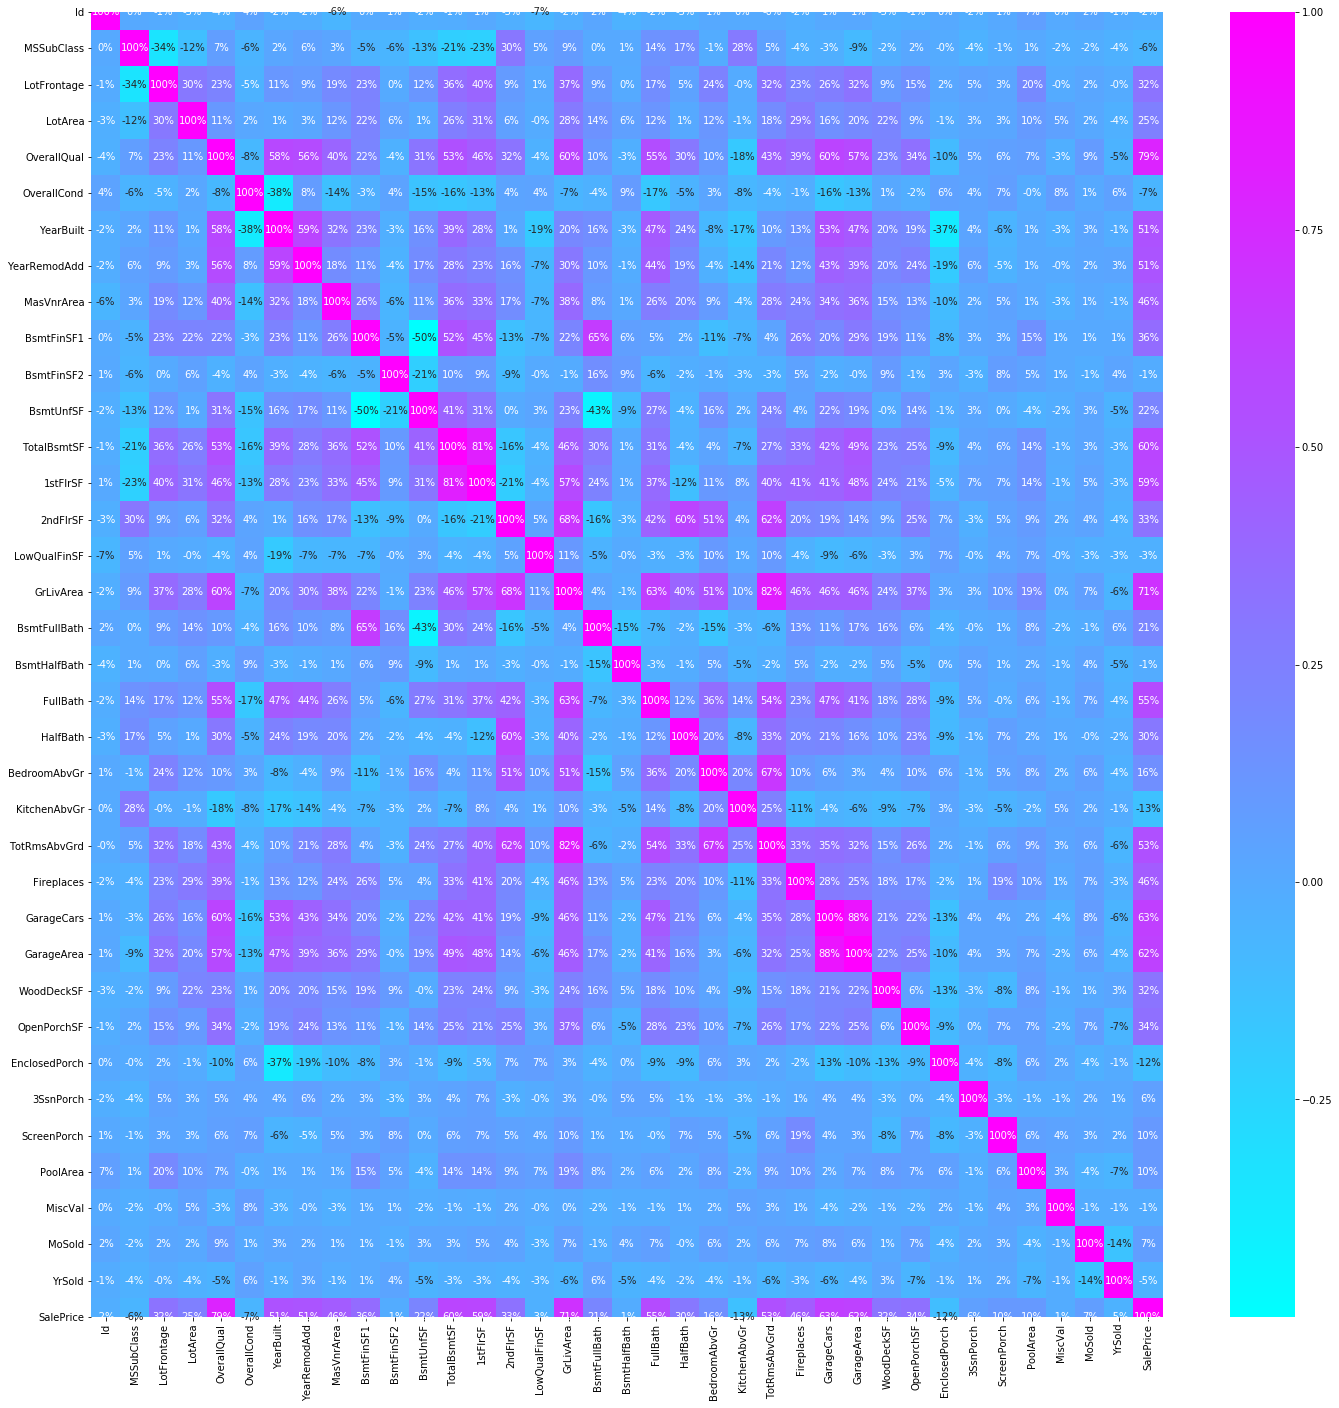

In [19]:
plt.figure(figsize=(24,24))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:

1. SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

2. SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

3. We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

4. No correlation has been observed between the column Id and other columns so we will be dropping this column.

Text(0.5, 1.0, 'correaltion with target variable SalePrice')

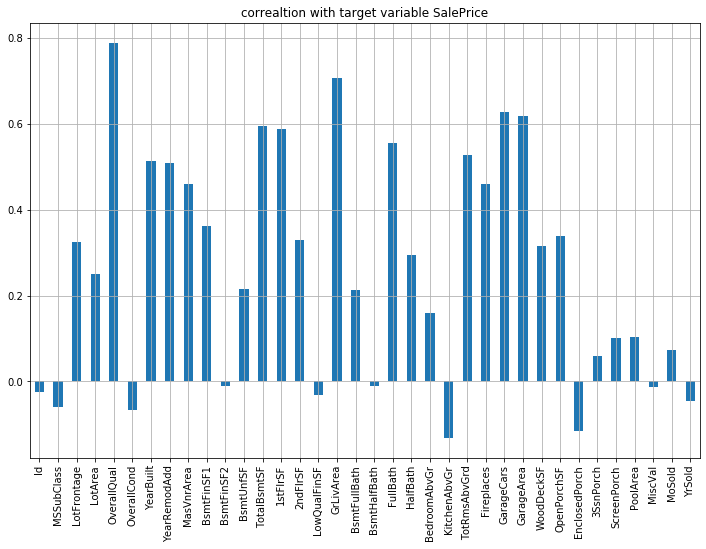

In [20]:
#checking the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
df.drop('SalePrice', axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion with target variable SalePrice")

Observation:

1. The column OverallQual is most positively correlated with SalePrice.

2. The column KitchenAbvGrd is most negatively correlated with SalePrice.

# Data Visualization
Our target variable is SalePrice

# Univariate Analysis

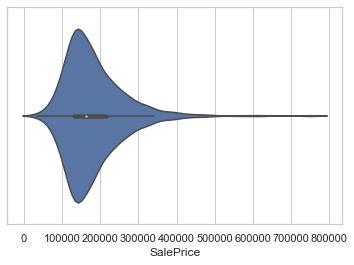

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [21]:
#Checking the target variable

sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

df['SalePrice'].value_counts()

Observation:

Maximum number of SalePrice lies between 140000 and 230000.

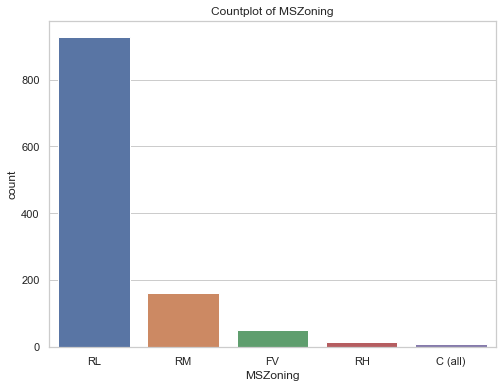

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [22]:
#checking the column MsZoning
plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=df)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

df['MSZoning'].value_counts()

Observation:

Maximum, 928 number of MSZoning are RL.

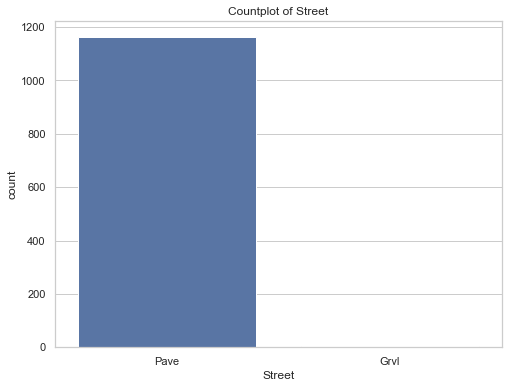

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [23]:
#checking the column Street
plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=df)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

df['Street'].value_counts()

Observation:

Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

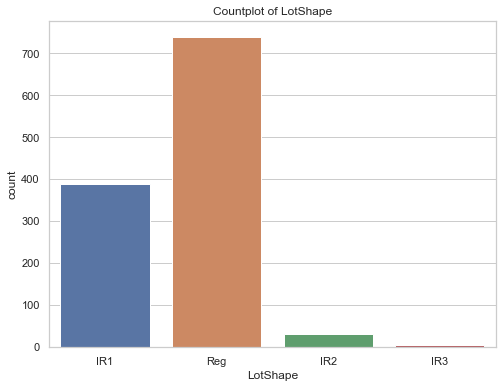

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [24]:
#checking the column LotShape
plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=df)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

df['LotShape'].value_counts()

Observation:

Maximum, 740 number of LotShape are Reg.

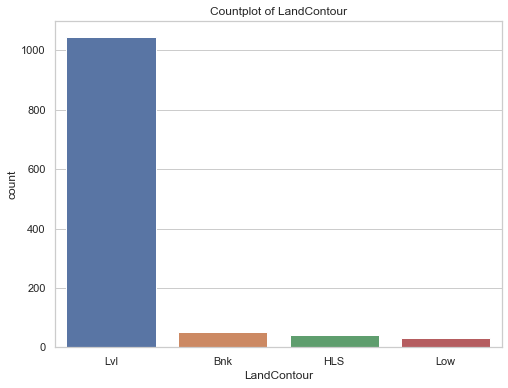

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [25]:
#checking the column LandContour
plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=df)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

df['LandContour'].value_counts()

Observation:

Maximum, 1046 number of LandContour are Lvl.

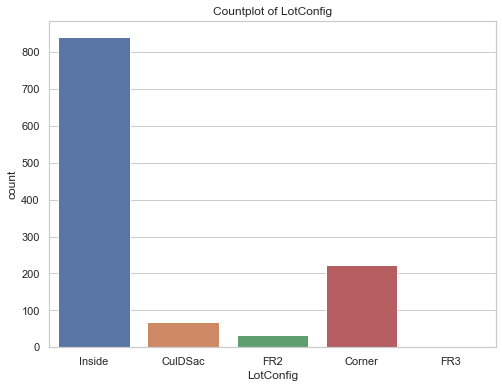

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [26]:
#checking the column LotConfig
plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=df)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

df['LotConfig'].value_counts()

Observation:

Maximum, 842 number of LotConfig are Inside.

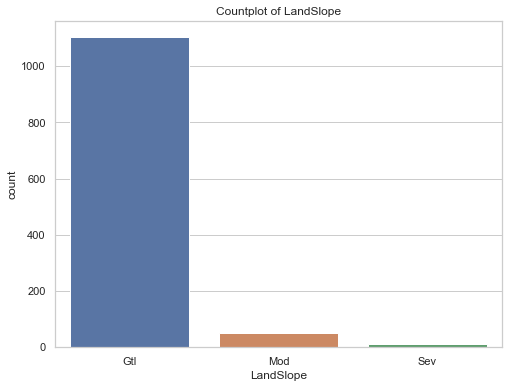

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [27]:
#checking the column LandSlope
plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=df)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

df['LandSlope'].value_counts()

Observation:

Maximum, 1105 number of LandSlope are Gtl.

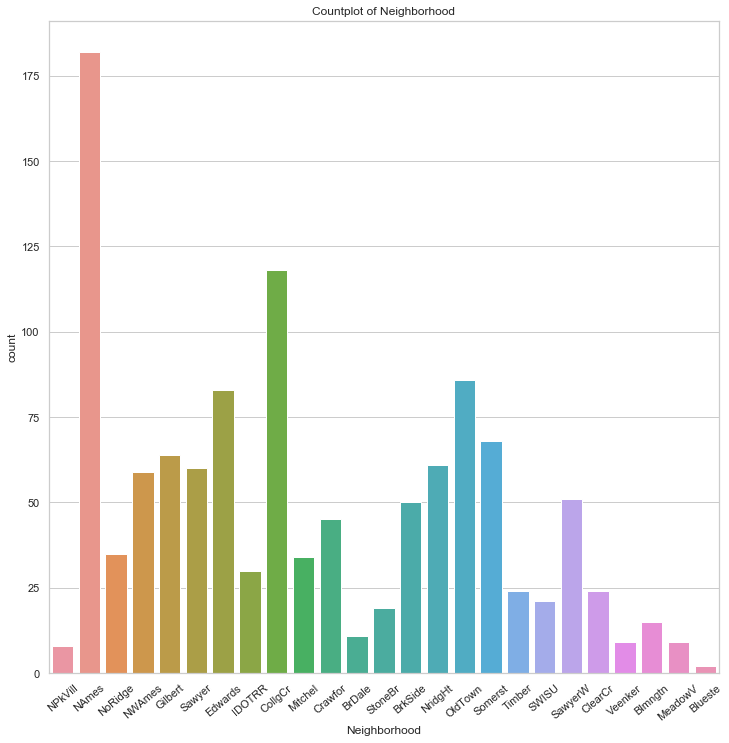

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [28]:
#checking the column Neighborhood
plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=df)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

df['Neighborhood'].value_counts()

Observation:

Maximum, 182 number of Neighborhood are NAmes.

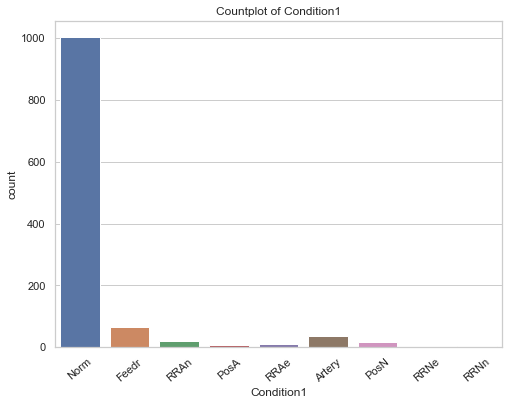

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [29]:
#checking the column Condition1
plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=df)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

df['Condition1'].value_counts()

Observation:

Maximum, 1005 number of Condition1 is Norm.

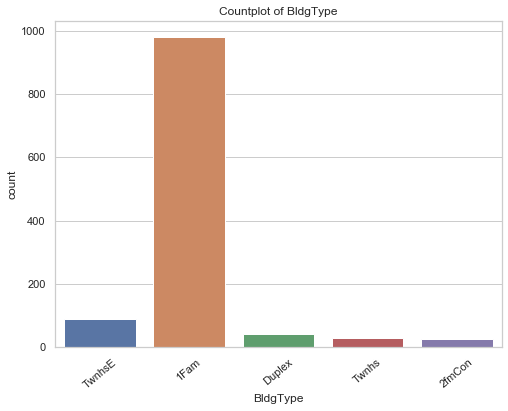

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [30]:
#checking the column BldgType
plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

df['BldgType'].value_counts()

Observation:

Maximum, 981 number of BldgType are 1Fam.

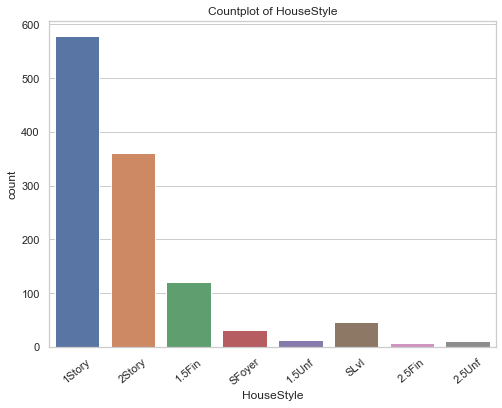

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [31]:
#checking the column HouseStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

df['HouseStyle'].value_counts()

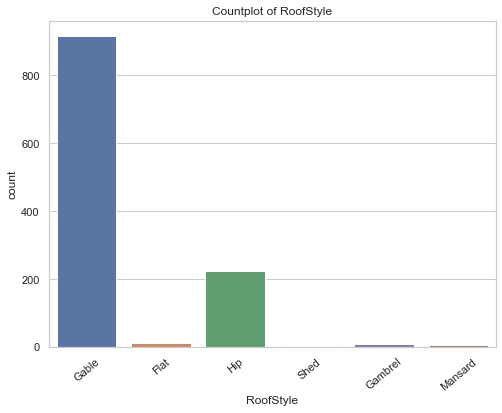

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [32]:
#checking the column RoofStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

df['RoofStyle'].value_counts()

Observation:

Maximum, 915 number of RoofStyle are Gable.

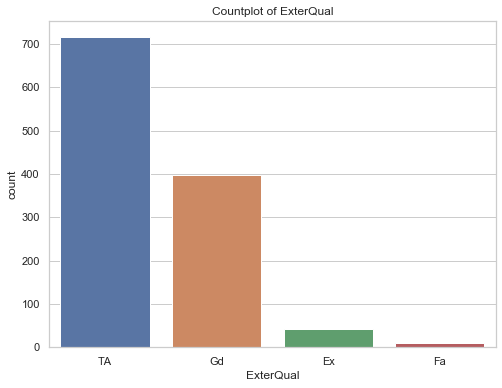

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [33]:
#checking the column ExterQual
plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

df['ExterQual'].value_counts()

Observation:

Maximum, 717 number of ExterQual is TA.

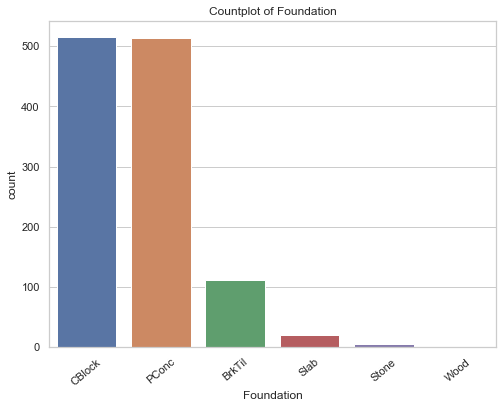

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [34]:
#checking the column Foundation
plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

df['Foundation'].value_counts()

Observation:

Maximum, 516 number of Foundation are CBlock.

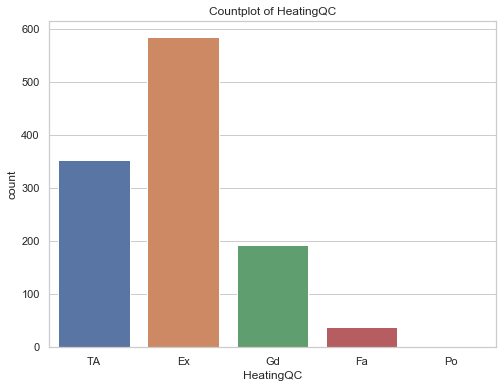

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [35]:
#checking the column HeatingQC
plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

df['HeatingQC'].value_counts()

Observation:

Maximum, 585 number of HeatingQC is Ex.

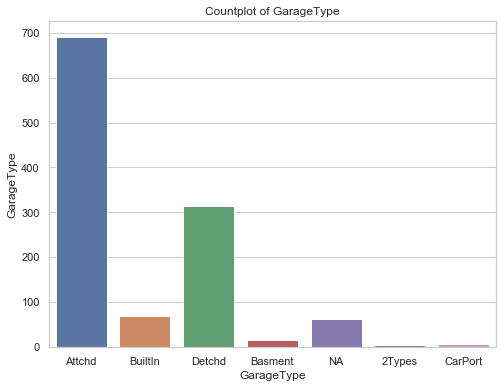

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [36]:
#checking the column GarageType
plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

df['GarageType'].value_counts()

Observation:

Maximum, 691 number of GarageType are Attchd.

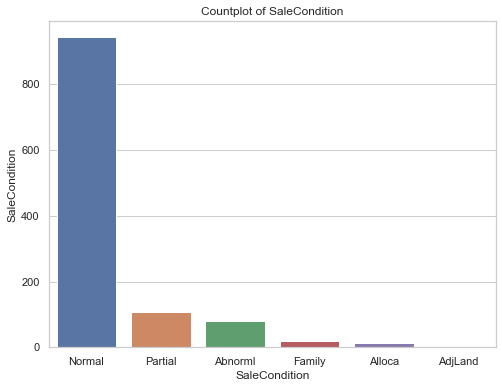

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [37]:
#checking the column SaleCondition
plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

df['SaleCondition'].value_counts()

Observation:

Maximum, 945 number of SaleCondition is normal.

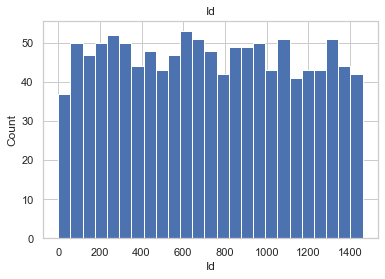

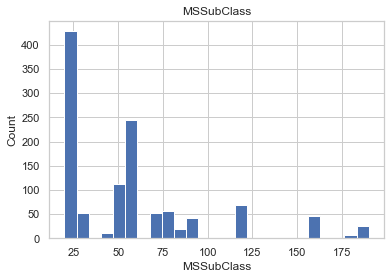

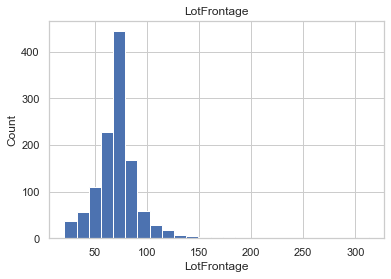

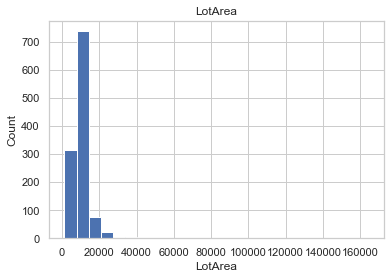

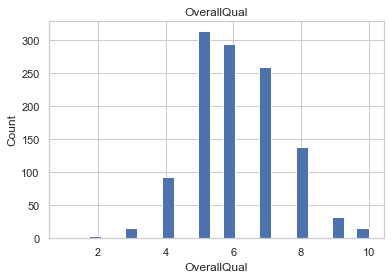

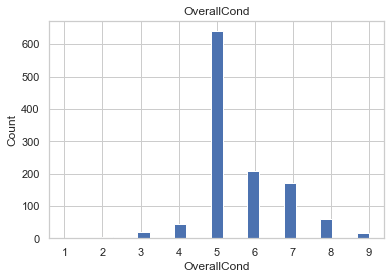

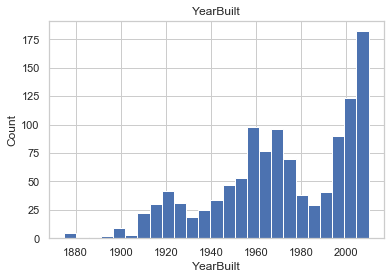

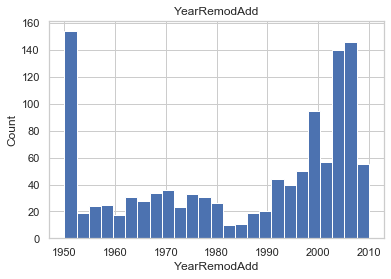

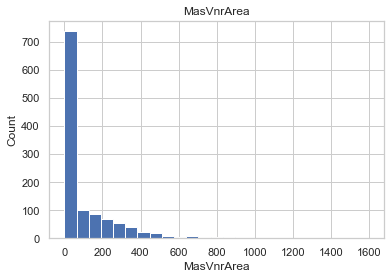

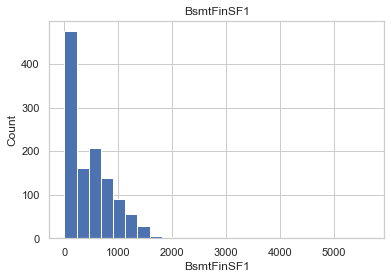

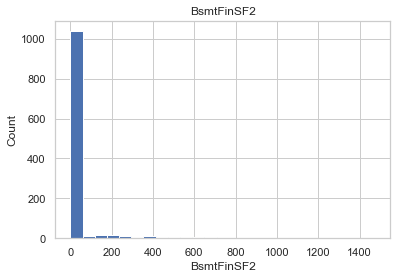

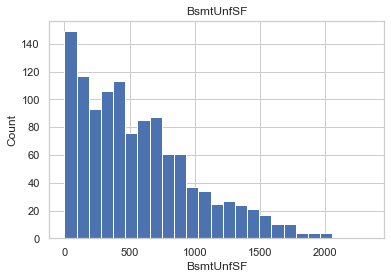

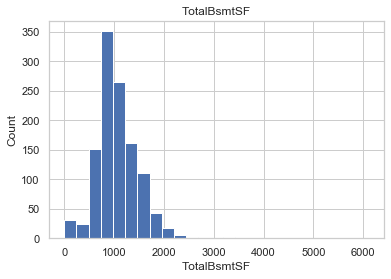

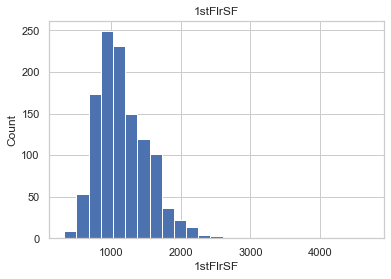

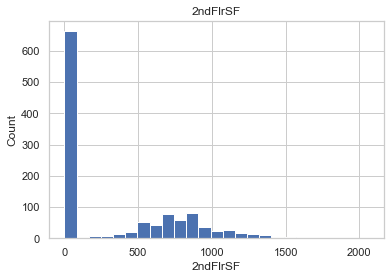

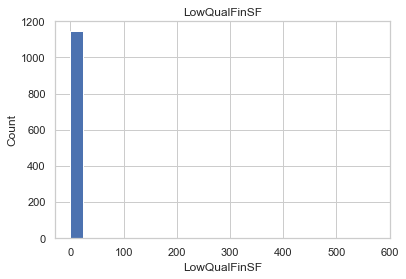

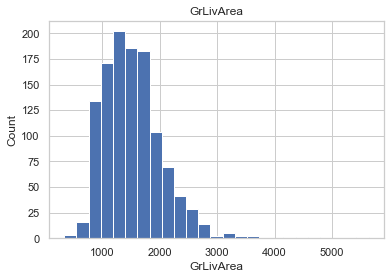

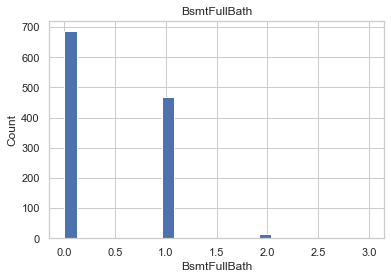

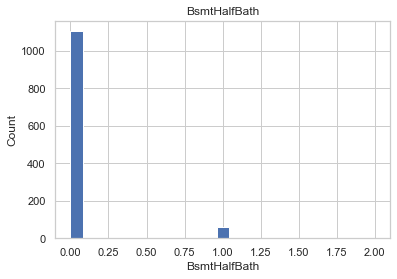

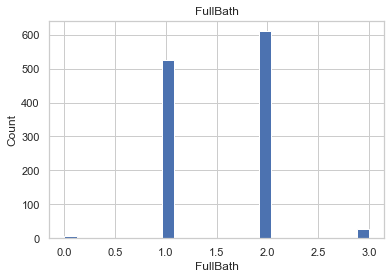

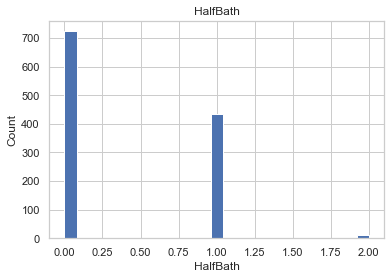

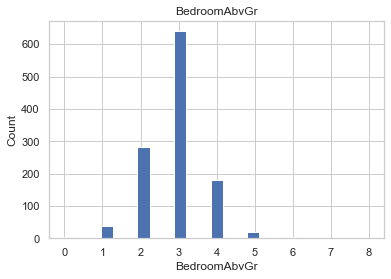

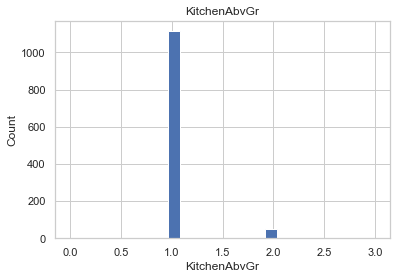

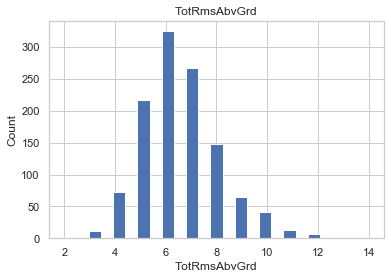

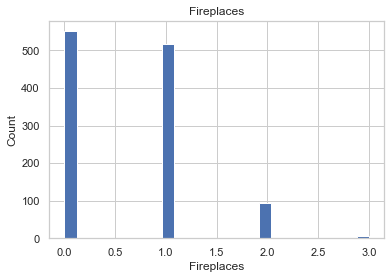

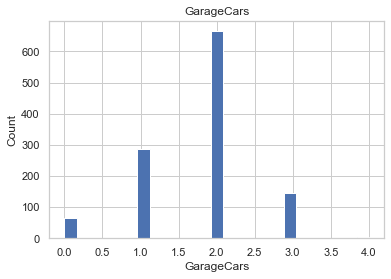

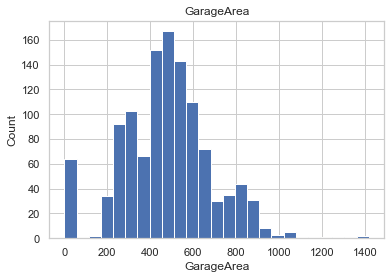

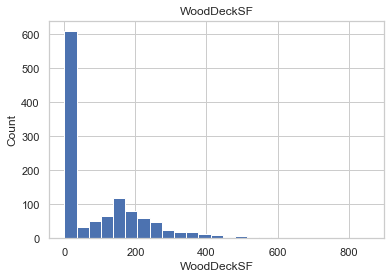

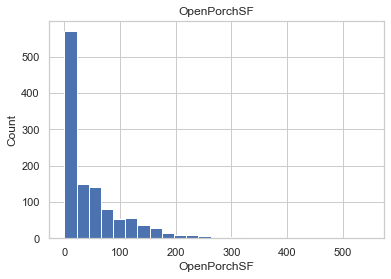

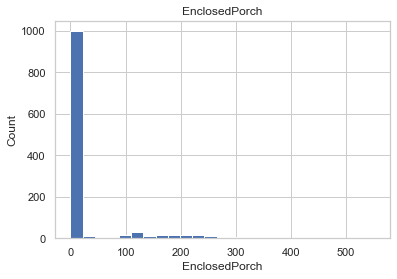

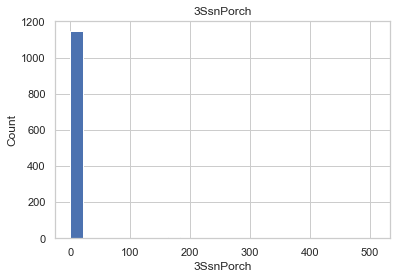

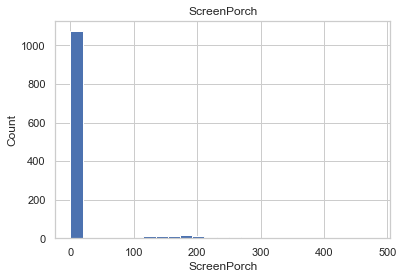

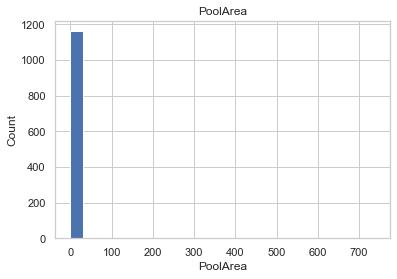

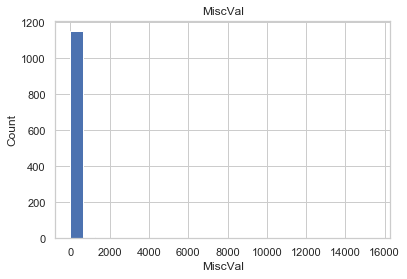

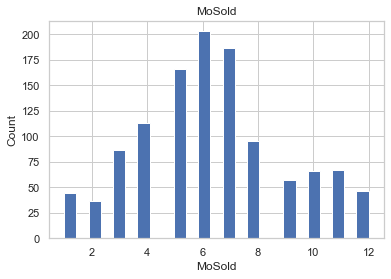

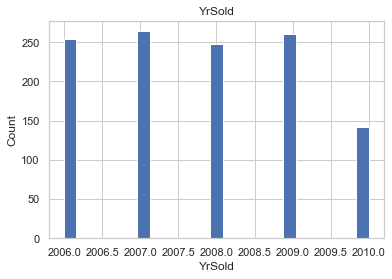

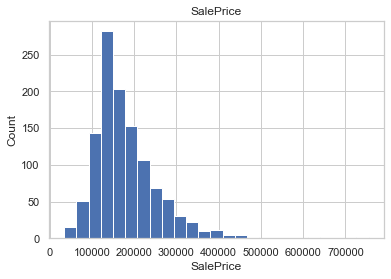

In [38]:
#Creating histogram of every numerical column

for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Bivariate Analysis

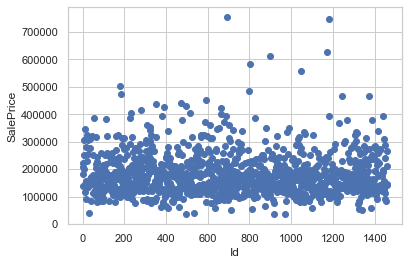

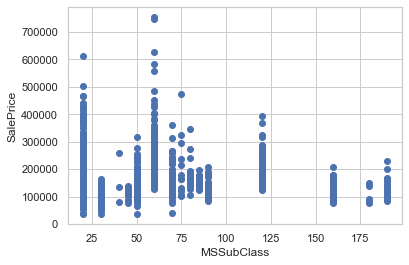

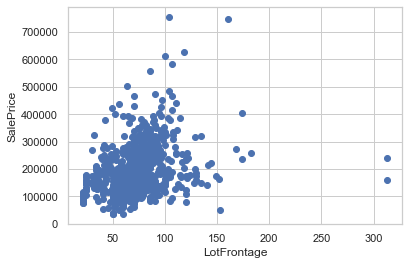

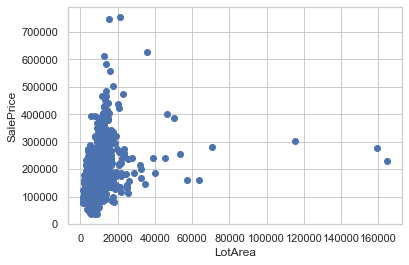

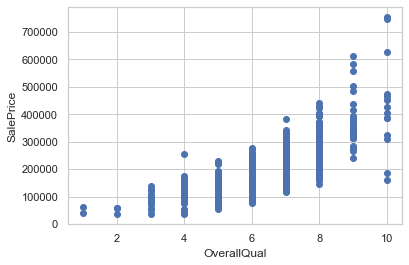

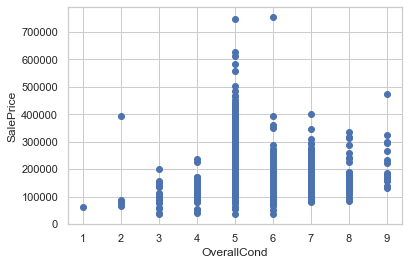

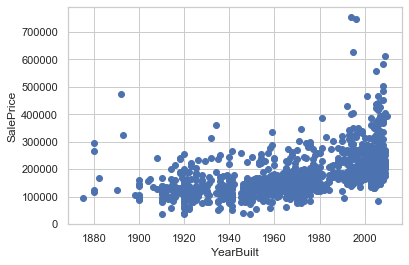

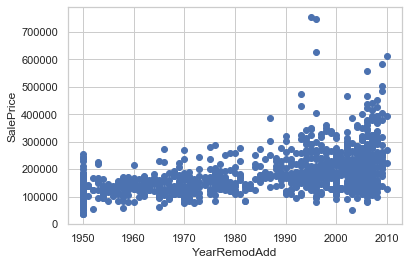

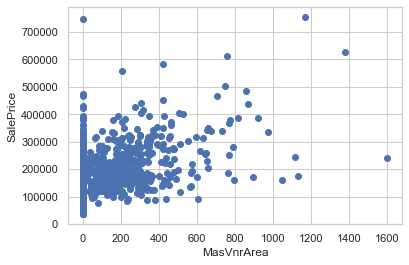

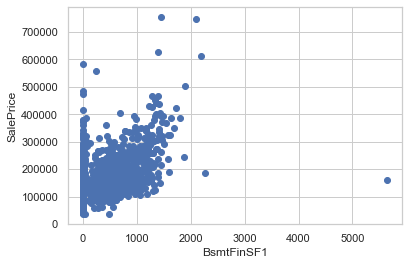

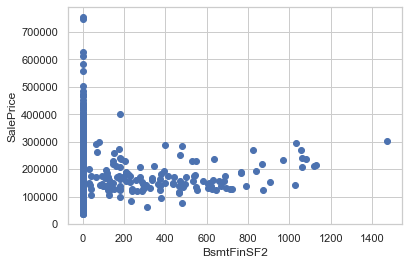

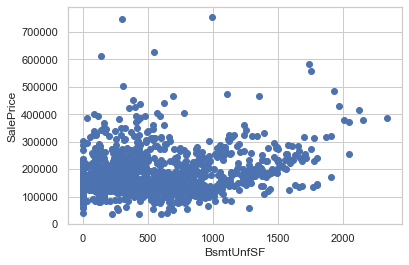

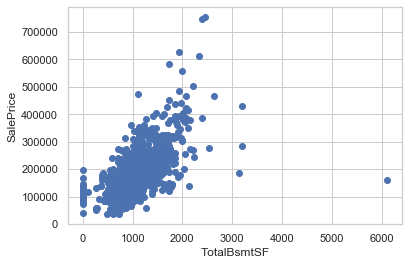

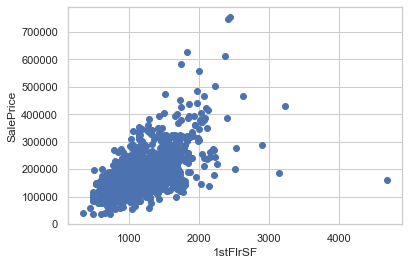

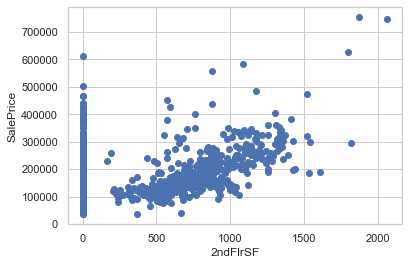

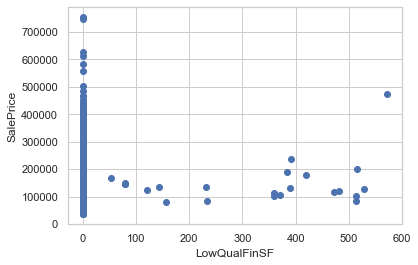

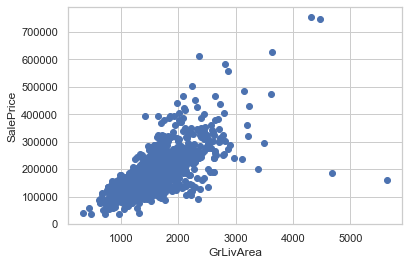

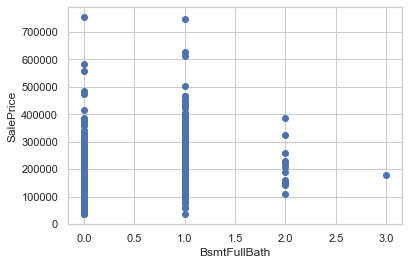

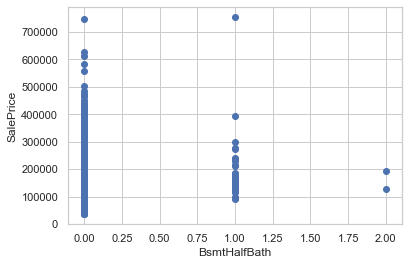

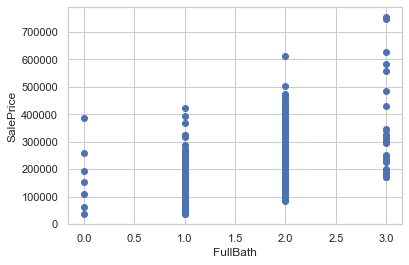

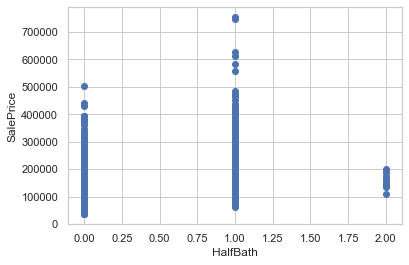

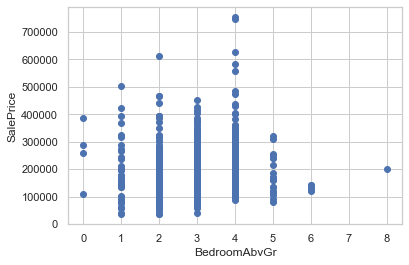

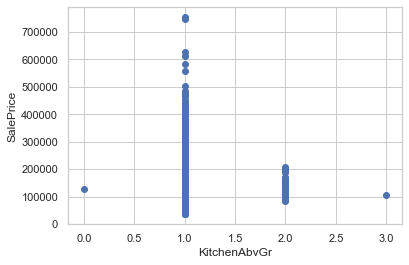

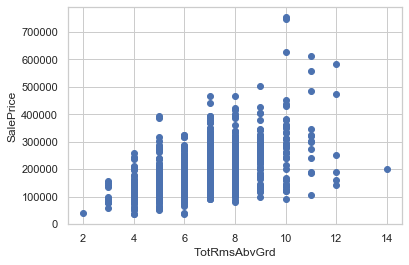

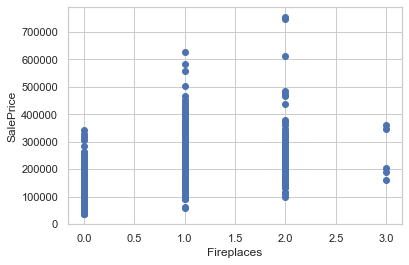

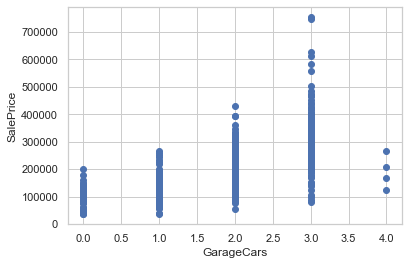

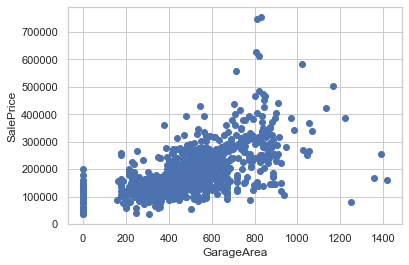

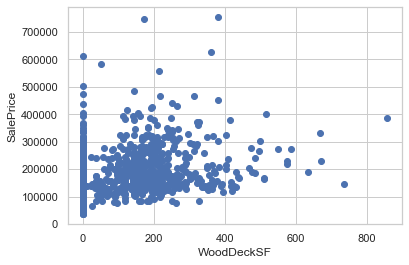

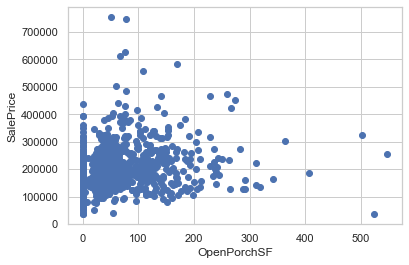

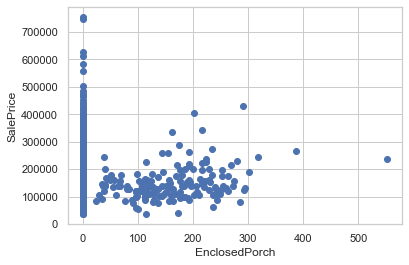

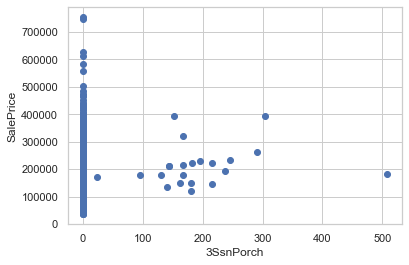

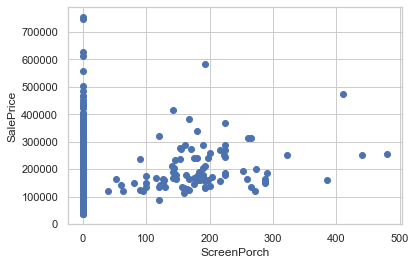

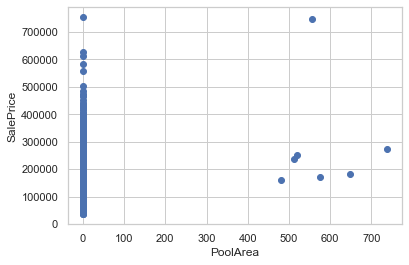

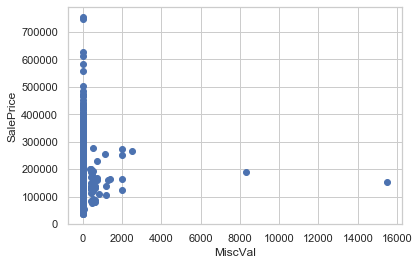

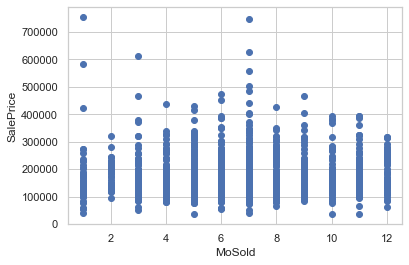

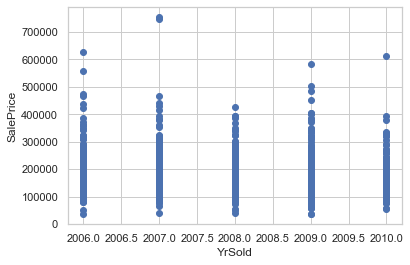

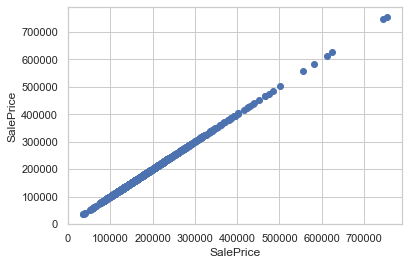

In [39]:
#Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

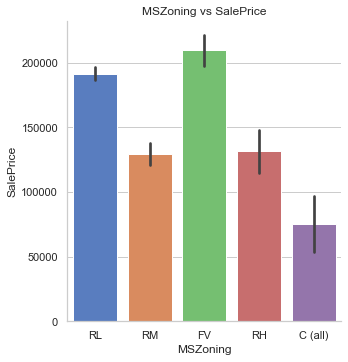

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [40]:
#Factor plot of MSZoning vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['MSZoning'].value_counts())

Observation:

SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

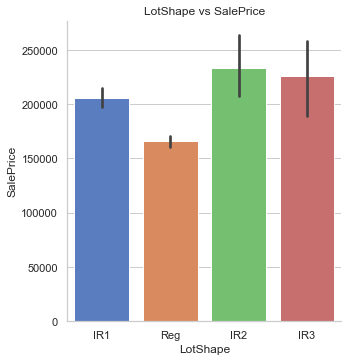

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [41]:
#Factor plot of LotShape vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['LotShape'].value_counts())

Observation:

SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

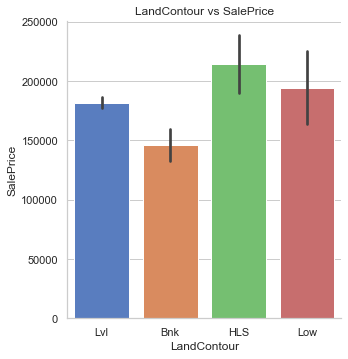

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [42]:
#Factor plot of LandContour vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['LandContour'].value_counts())

Observation:

SalePrice is maximum with HLS LandContour.

<Figure size 576x432 with 0 Axes>

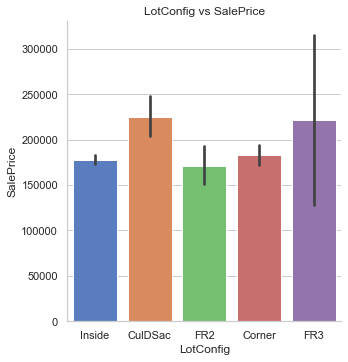

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [43]:
#Factor plot of LotConfig vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['LotConfig'].value_counts())

Observation:

SalePrice is maximum with CulDsac LotConfig.

<Figure size 1152x1152 with 0 Axes>

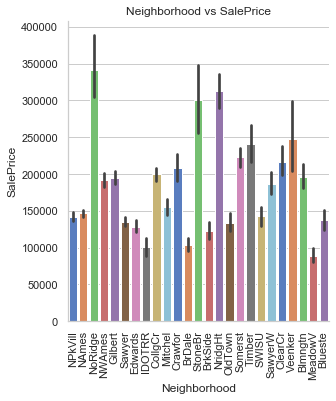

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [44]:
#Factor plot of Neighborhood vs SalePrice
plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['Neighborhood'].value_counts())

Observation:

SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

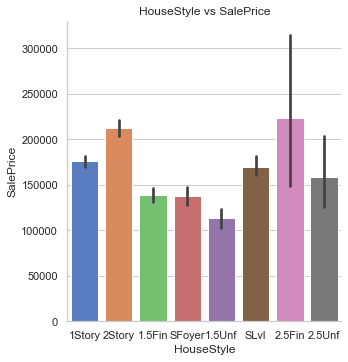

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [45]:
#Factor plot of HouseStyle vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['HouseStyle'].value_counts())

Observation:

SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

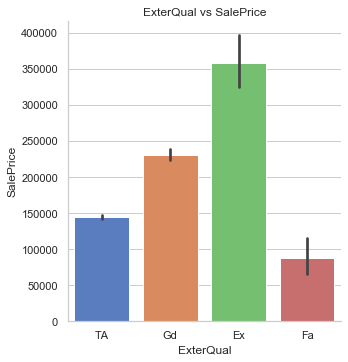

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [46]:
#Factor plot of ExterQual vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['ExterQual'].value_counts())

Observation:

SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

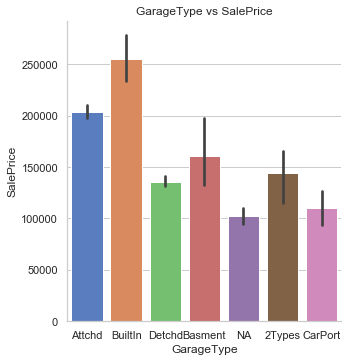

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [47]:
#Factor plot of GarageType vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['GarageType'].value_counts())

Observation:

SalePrice is maximum with Builtin GarageType.

<Figure size 576x432 with 0 Axes>

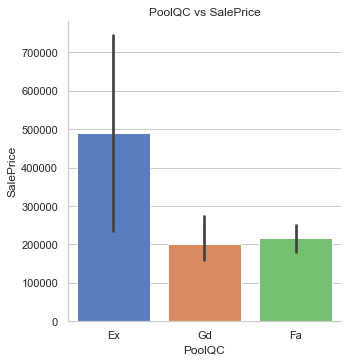

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [48]:
#Factor plot of PoolQC vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['PoolQC'].value_counts())

Observation:

SalePrice is maximum with Ex PoolQC.

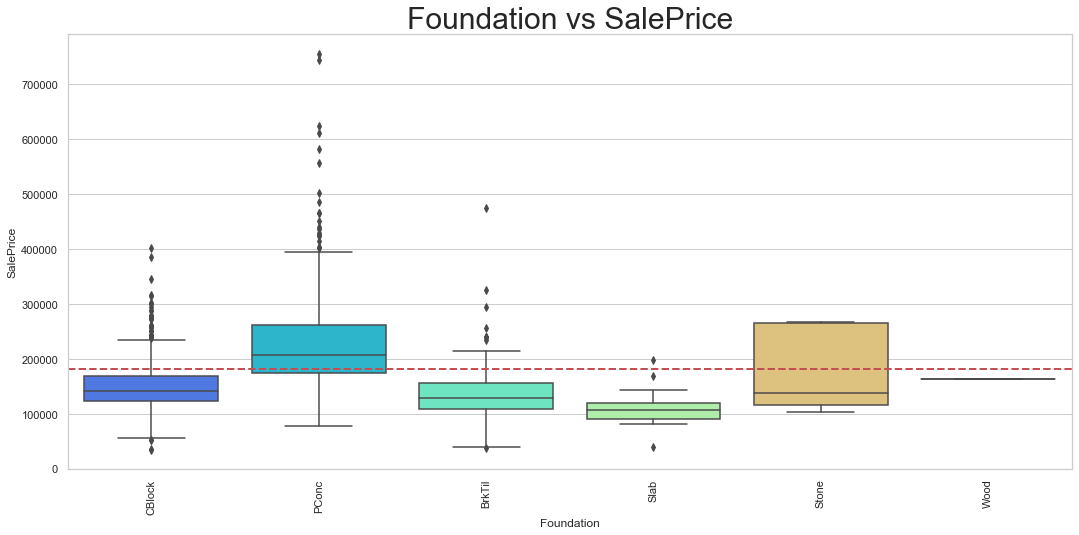

In [49]:
#Foundation vs SalePrice

plt.figure(figsize=(18,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:

SalePrice is maximum with PConc.

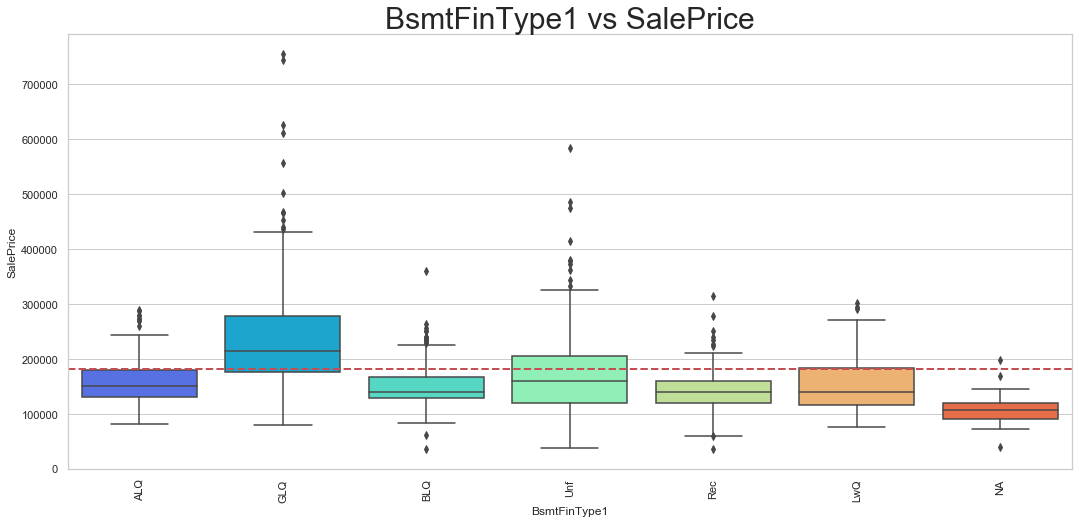

In [50]:
#BsmtFinType1 vs SalePrice

plt.figure(figsize=(18,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:

SalePrice is maximum with GLQ BsmtFinType1.

# Multivariate Analysis


<Figure size 1008x1008 with 0 Axes>

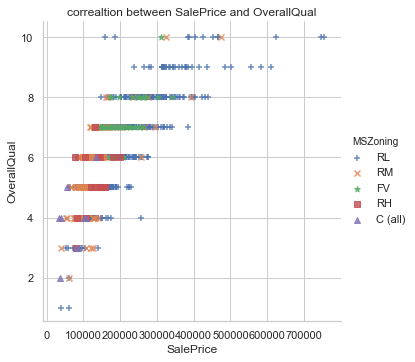

In [51]:
#scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallQual',fit_reg=False,data=df,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and OverallQual')
plt.ylabel('OverallQual')
plt.show()

Observation:

With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

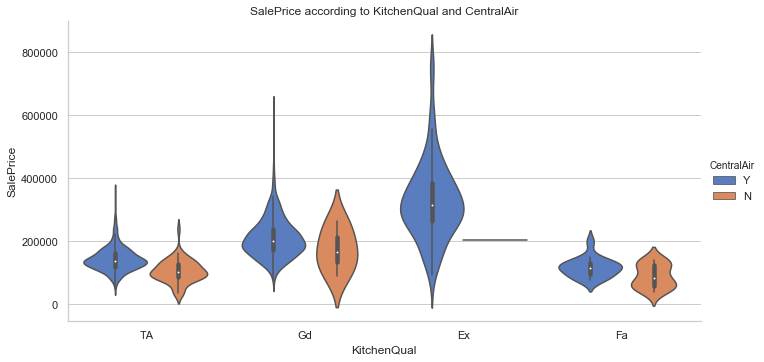

In [52]:
#checking GarageType and GarageCond with respect to SalePrice
sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=df,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

Observation:

SalePrice is maximum with Ex kitchenQual and CentralAir.

<Figure size 1008x1008 with 0 Axes>

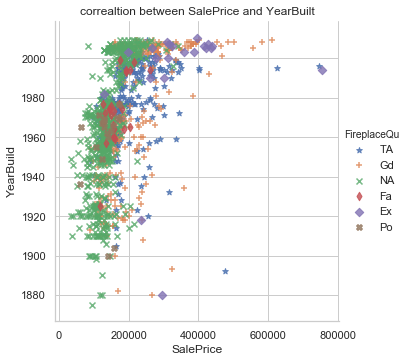

In [53]:
#scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=df,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.show()

Observation:

As the YearBuilt is increasing SalePrice is also increasing.

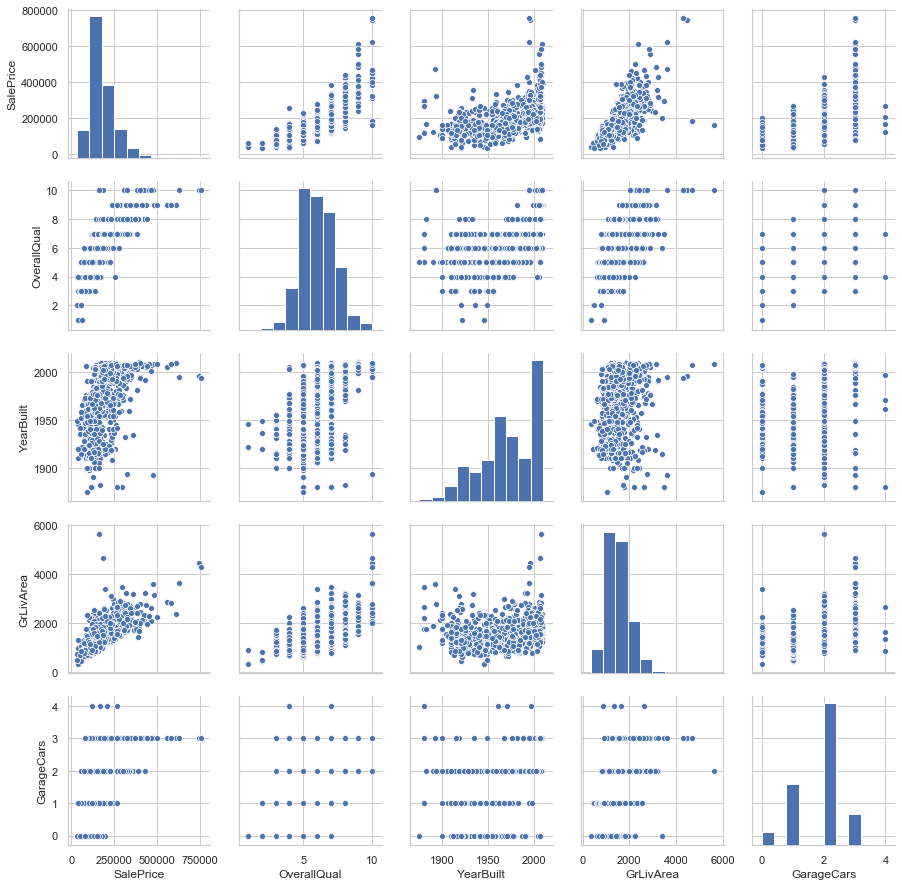

In [54]:
#plotting pairplot
sns.pairplot(df, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars'])

Observation:

SalePrice is highly positively correlated with GrLivArea and OverallQual.

# Encoding categorical columns


In [55]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

In [56]:
df

Id  MSSubClass  LotFrontage  LotArea Alley Utilities  OverallQual  \
0     127         120         70.0     4928   NaN    AllPub            6   
1     889          20         95.0    15865   NaN    AllPub            8   
2     793          60         92.0     9920   NaN    AllPub            7   
3     110          20        105.0    11751   NaN    AllPub            6   
4     422          20         70.0    16635   NaN    AllPub            6   
...   ...         ...          ...      ...   ...       ...          ...   
1163  289          20         70.0     9819   NaN    AllPub            5   
1164  554          20         67.0     8777   NaN    AllPub            4   
1165  196         160         24.0     2280   NaN    AllPub            6   
1166   31          70         50.0     8500  Pave    AllPub            4   
1167  617          60         70.0     7861   NaN    AllPub            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0               5       1976          1976         0.0         120   
1               6       1970          1970         0.0         351   
2               5       1996          1997         0.0         862   
3               6       1977          1977       480.0         705   
4               7       1977          2000       126.0        1246   
...           ...        ...           ...         ...         ...   
1163            5       1967          1967        31.0         450   
1164            5       1949          2003         0.0           0   
1165            6       1976          1976         0.0         566   
1166            4       1920          1950         0.0           0   
1167            5       2002          2003         0.0         457   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0              0        958         1078       958         0             0   
1            823       1043         2217      2217         0             0   
2              0        255         1117      1127       886             0   
3              0       1139         1844      1844         0             0   
4              0        356         1602      1602         0             0   
...          ...        ...          ...       ...       ...           ...   
1163           0        432          882       900         0             0   
1164           0          0            0      1126         0             0   
1165           0        289          855       855       601             0   
1166           0        649          649       649       668             0   
1167           0        326          783       807       702             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           958             0             0         2         0             2   
1          2217             1             0         2         0             4   
2          2013             1             0         2         1             3   
3          1844             0             0         2         0             3   
4          1602             0             1         2         0             3   
...         ...           ...           ...       ...       ...           ...   
1163        900             0             0         1         0             3   
1164       1126             0             0         2         0             2   
1165       1456             0             0         2         1             3   
1166       1317             0             0         1         0             3   
1167       1509             1             0         2         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  \
0                1             5           1        1977           2   
1                1             8           1        1970           2   
2                1             8           1        1997           2   
3                1             7           1        197

# Dropping unnecessary columns

In [57]:
df.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)

In [58]:
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  GarageArea  \
0                5           1        1977           2         440   
1                8           1        1970           2         621   
2                8           1        1997           2         455   
3                7           1        1977           2         546   
4                8           1        1977           2         529   
...   

# Handling outliers and skewness through winsorization technique

In [59]:
df_cap = df.copy()

In [60]:
from scipy import stats
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [61]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [62]:
percentile_capping(df_cap, features, 0.01, 0.10)

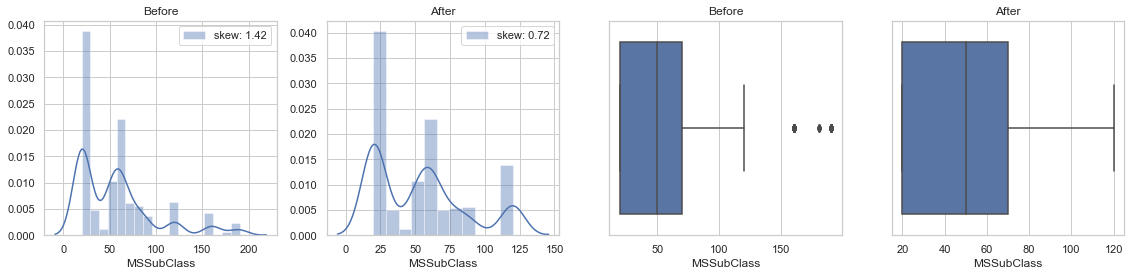

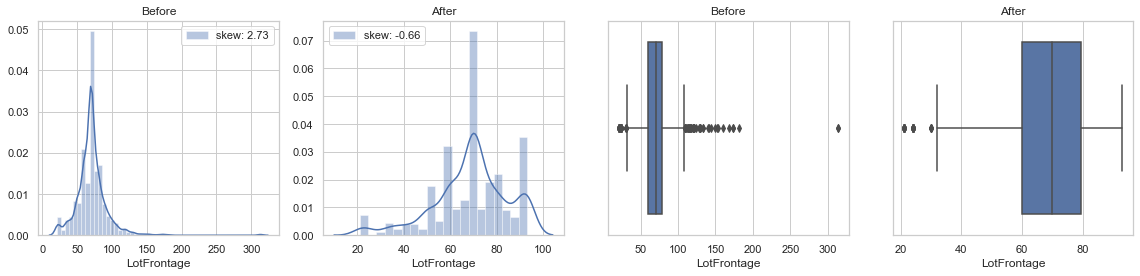

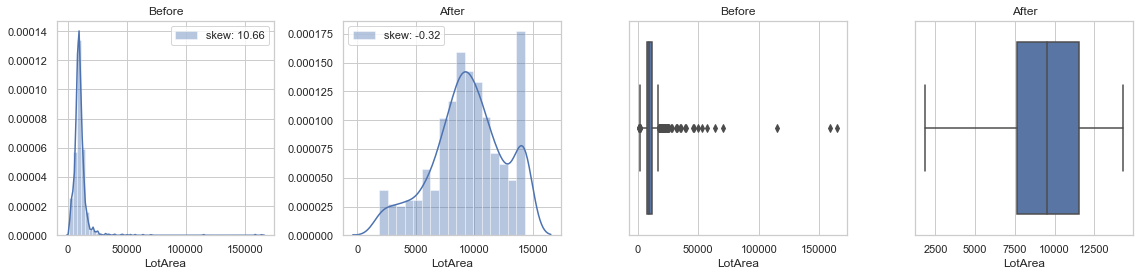

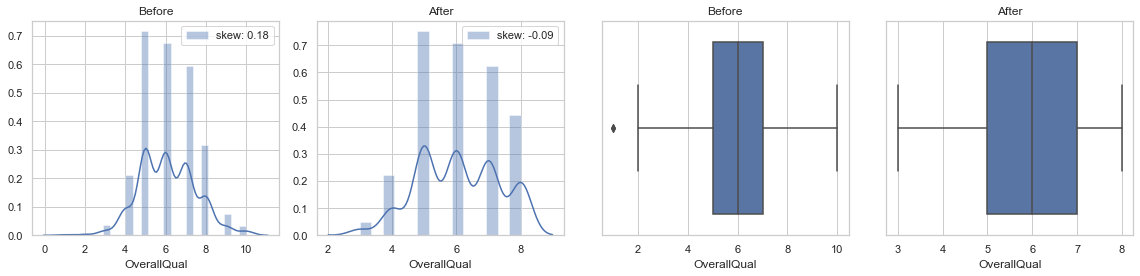

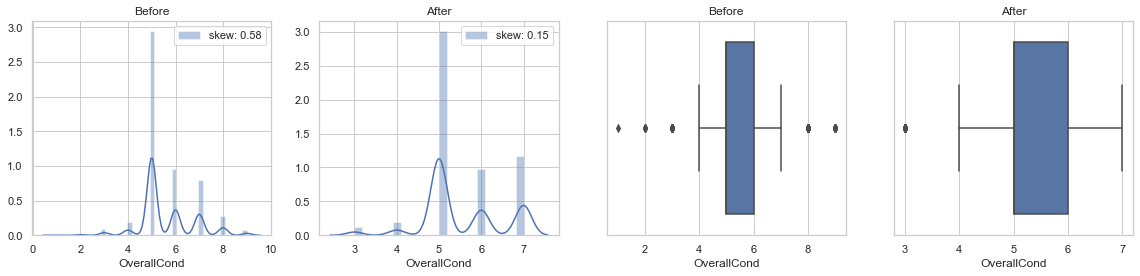

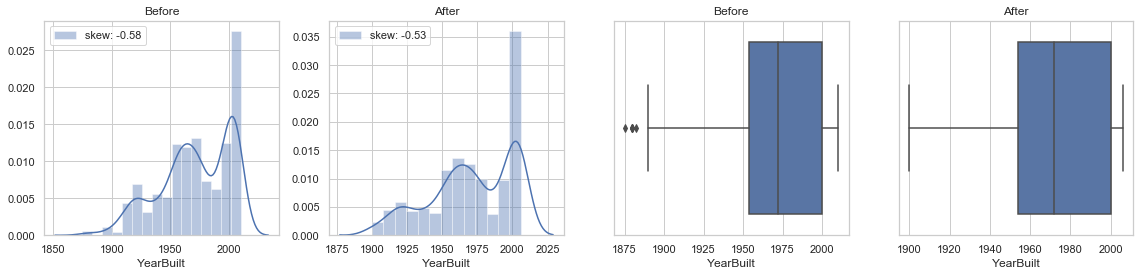

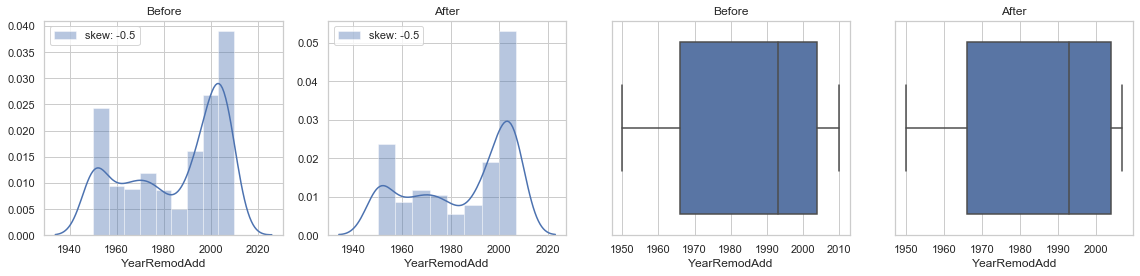

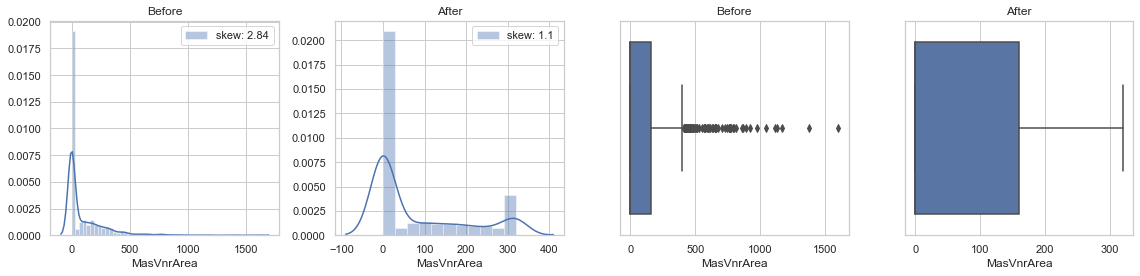

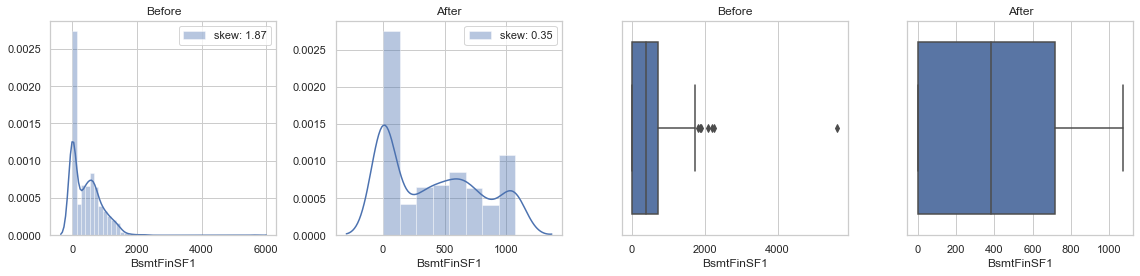

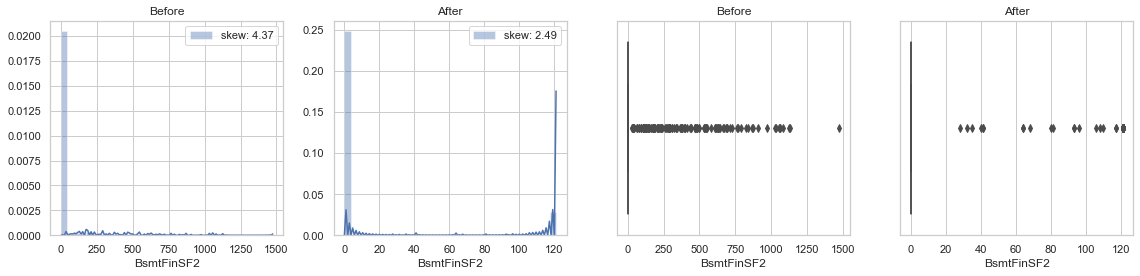

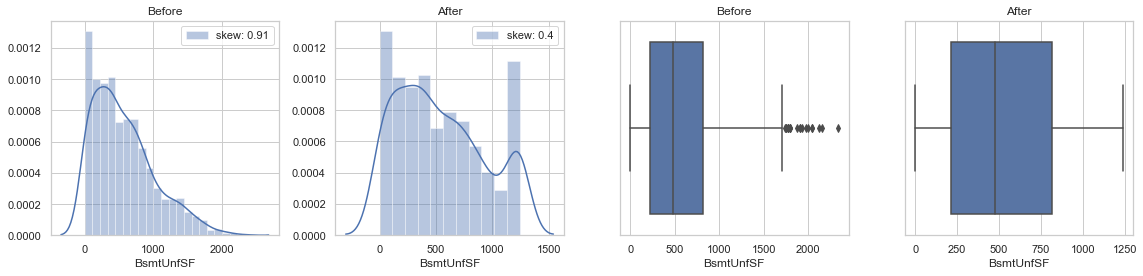

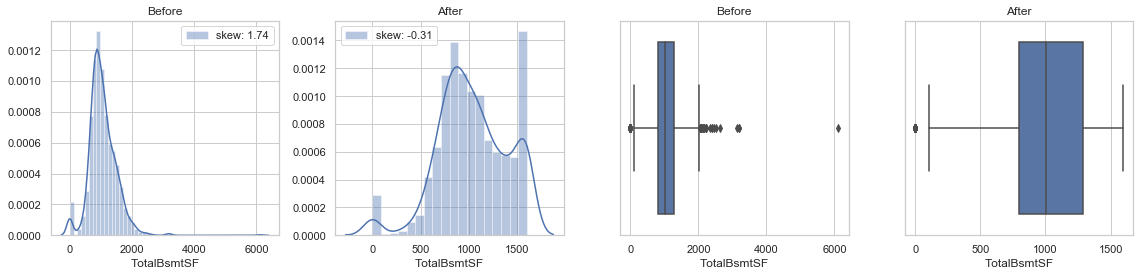

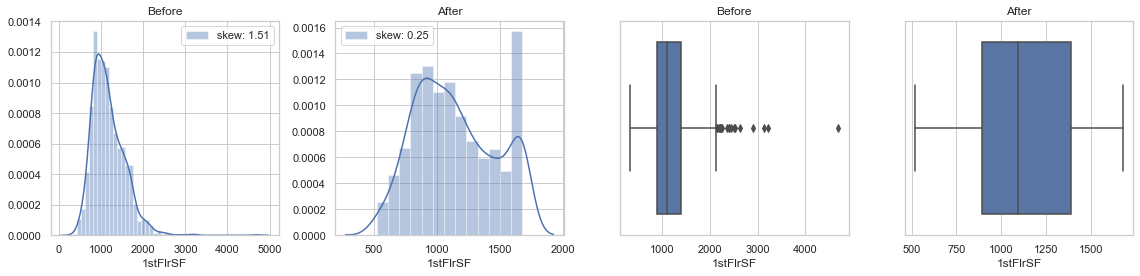

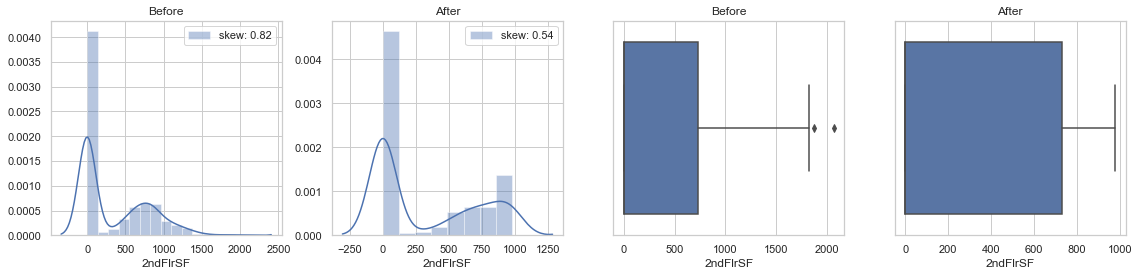

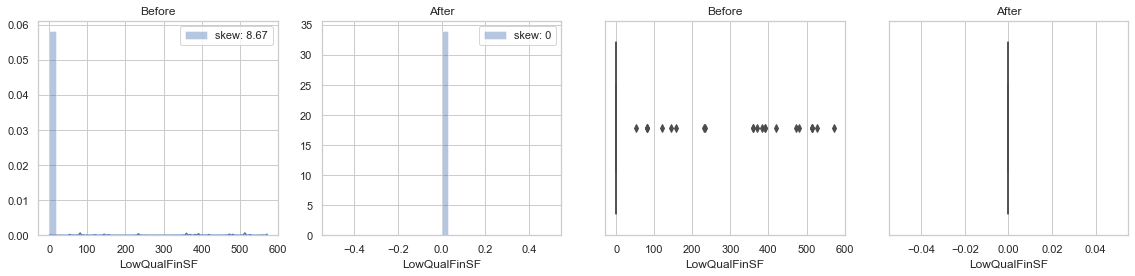

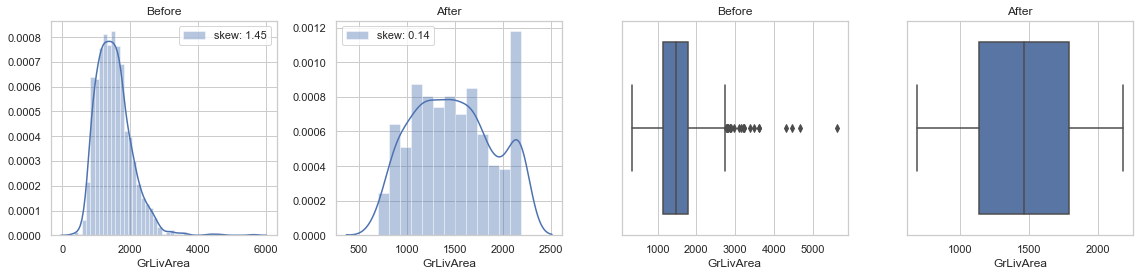

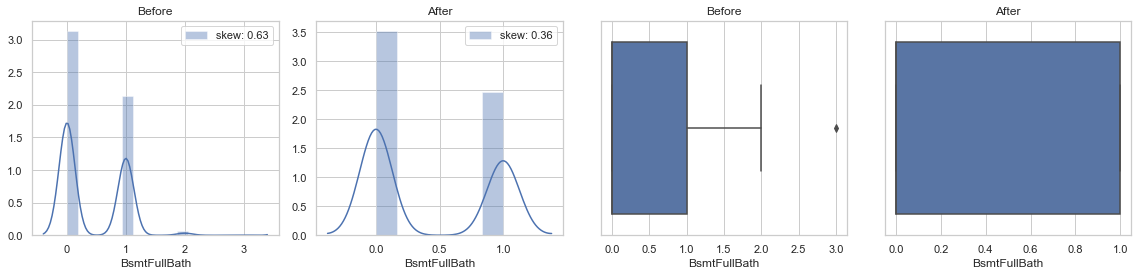

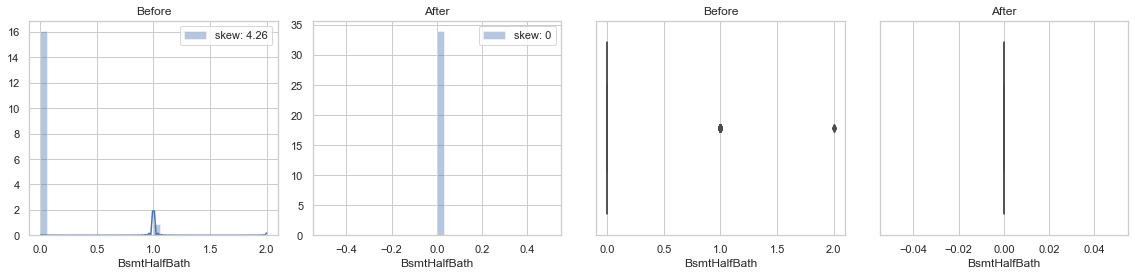

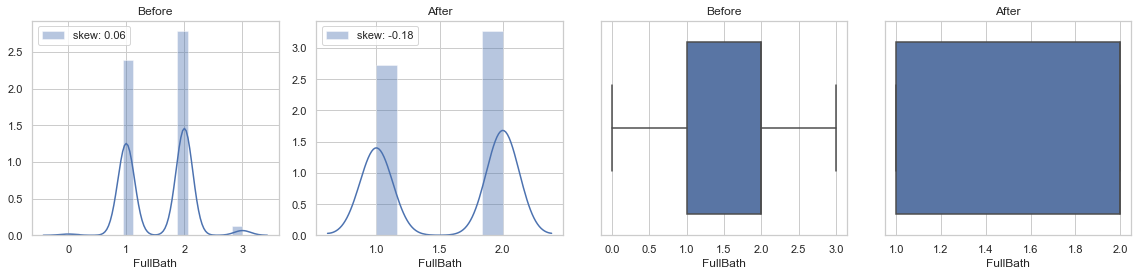

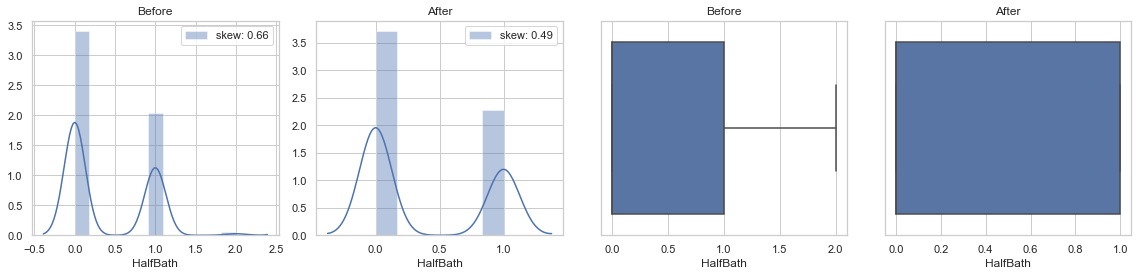

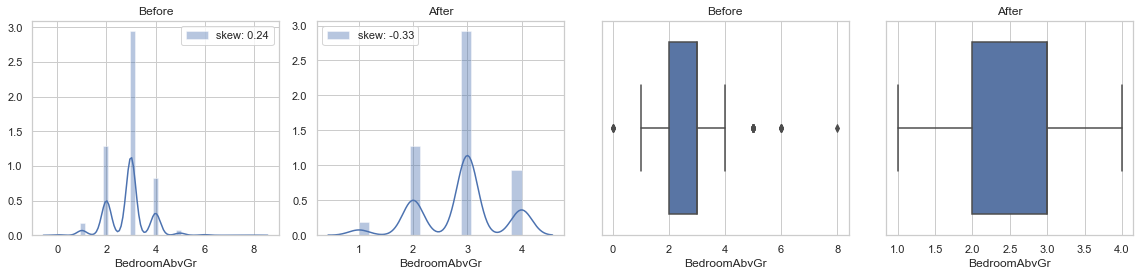

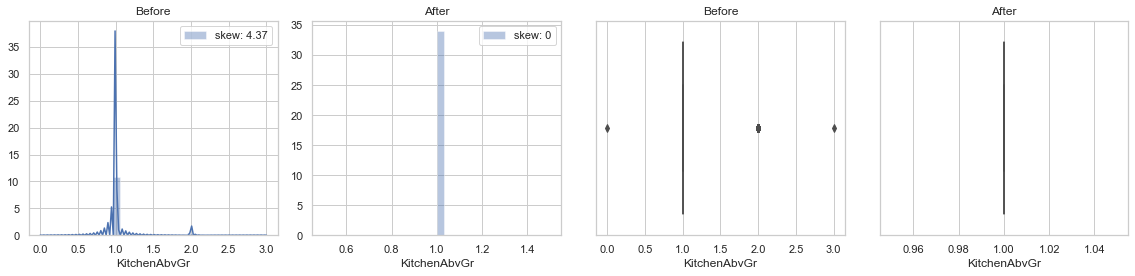

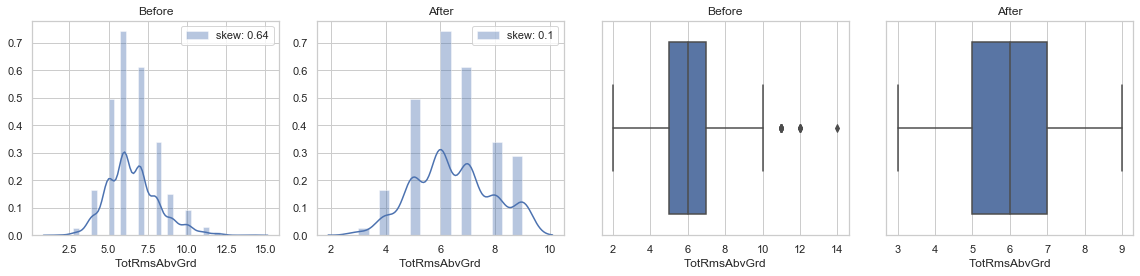

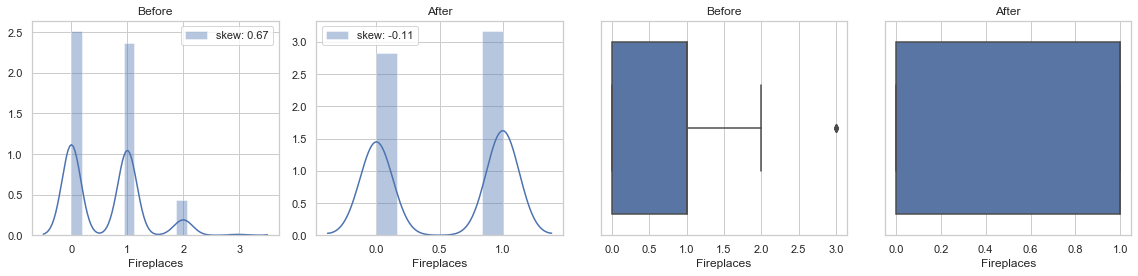

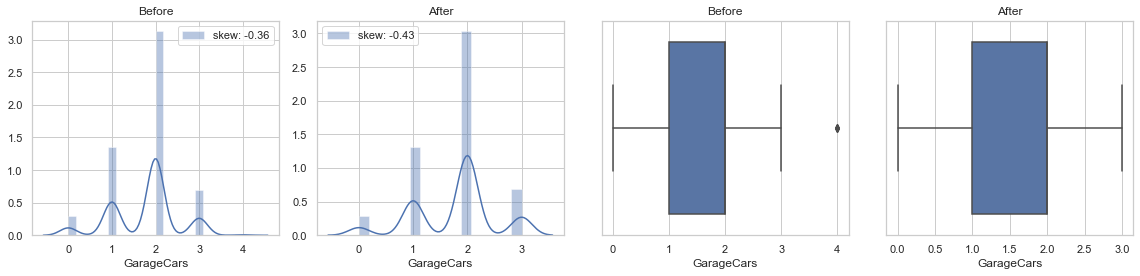

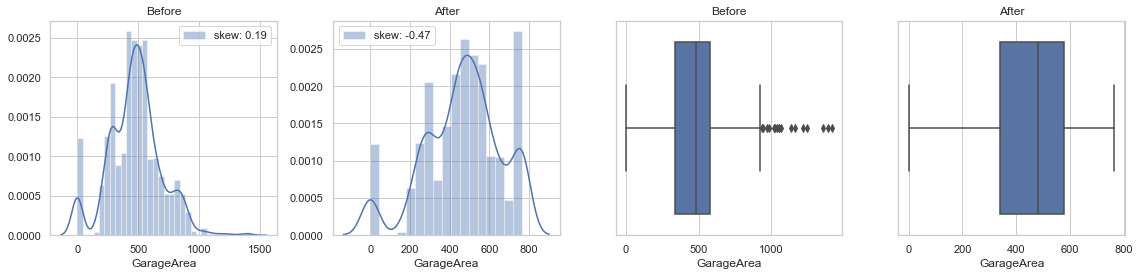

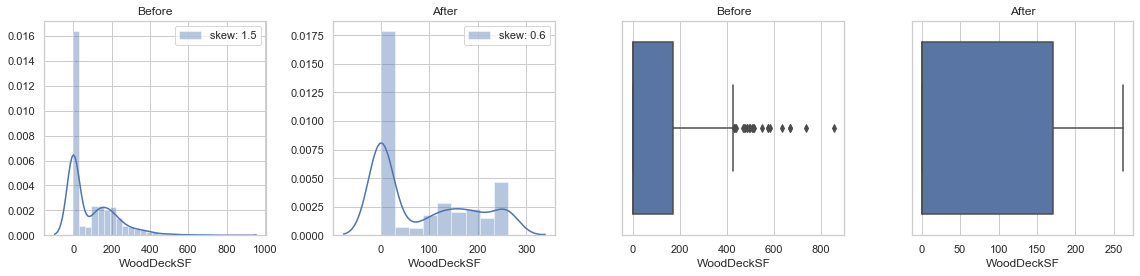

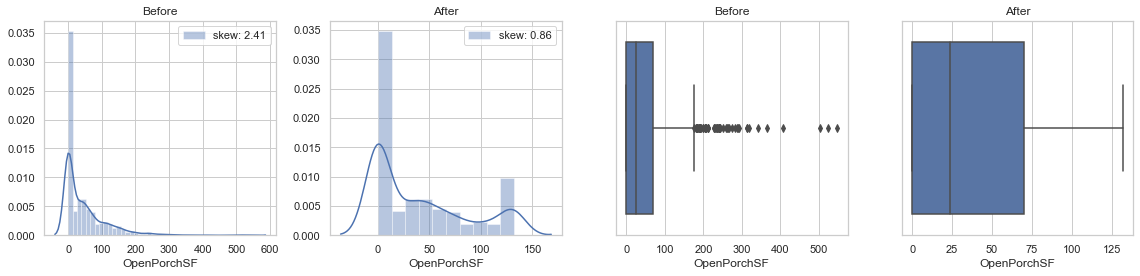

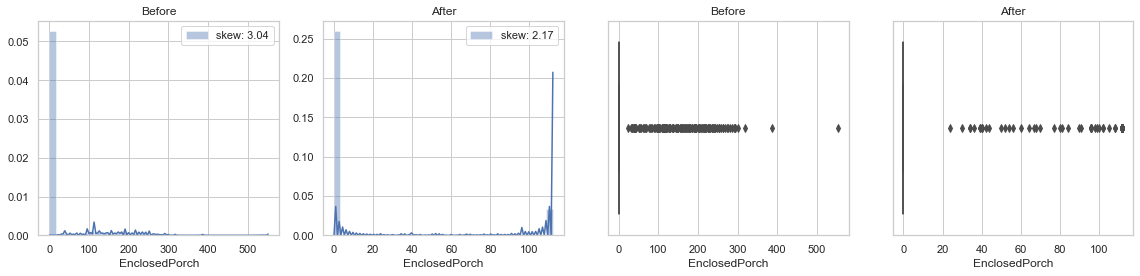

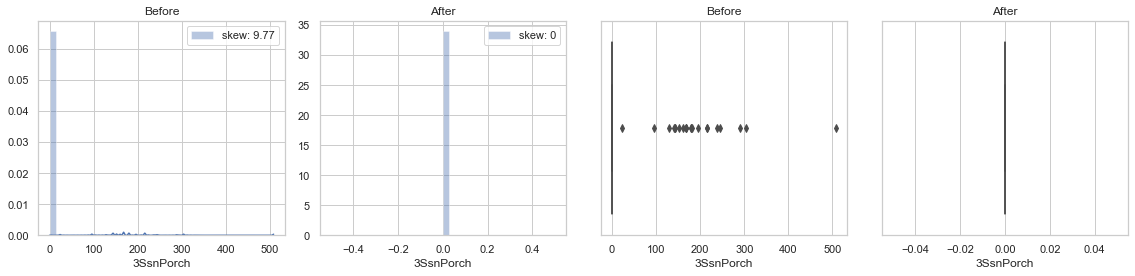

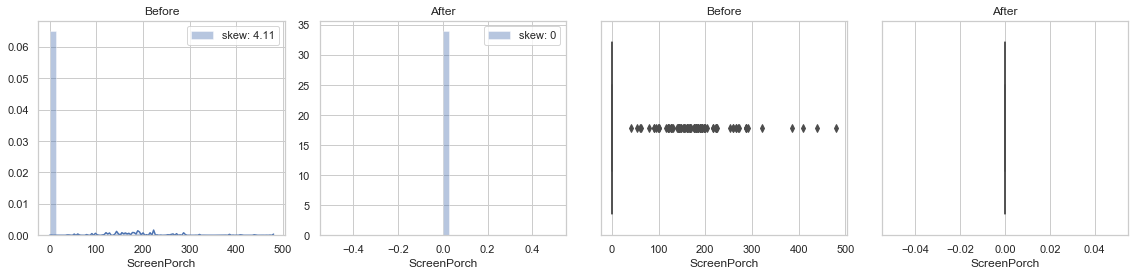

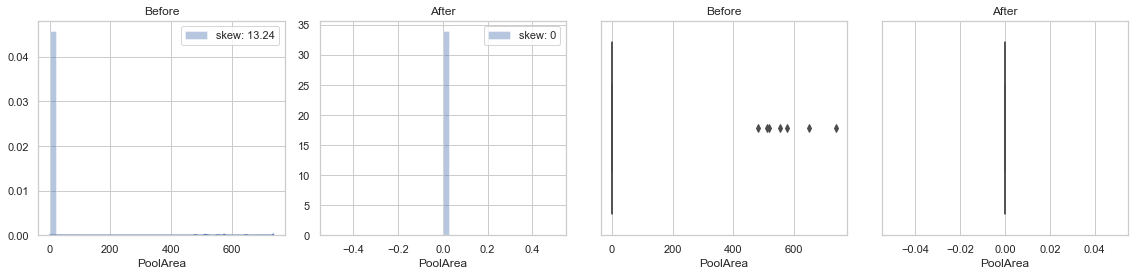

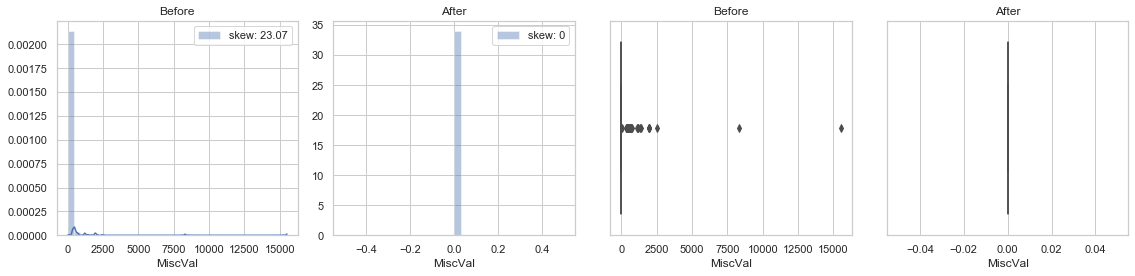

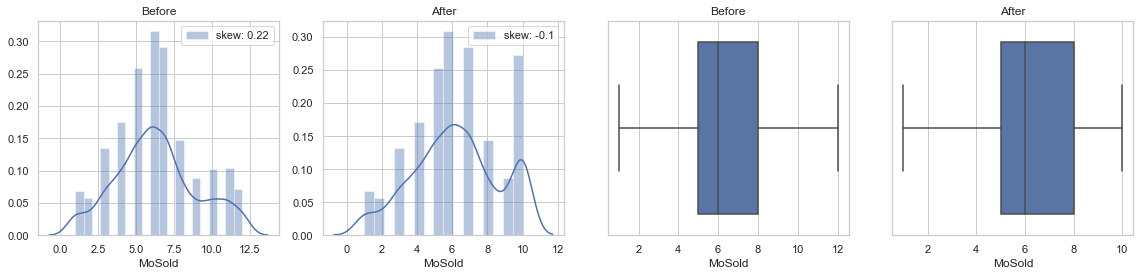

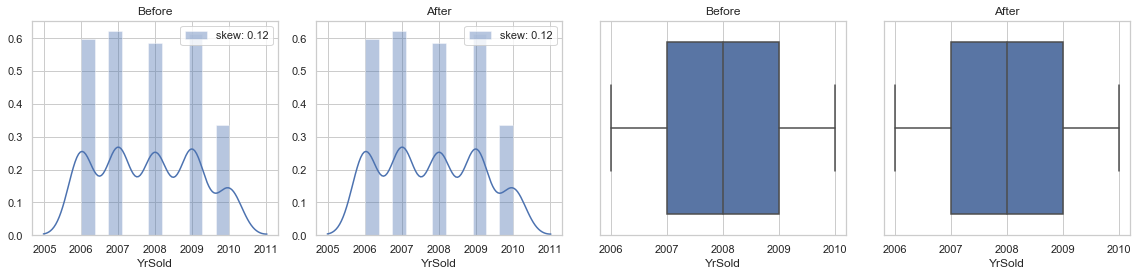

In [63]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [64]:
df_cap.shape

(1168, 244)

# Model Training


In [65]:
df_x=df_cap.drop(columns=['SalePrice'],axis=1)

In [66]:
y=df_cap['SalePrice']

In [67]:
#Scaling input variables

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# Applying PCA

In [68]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

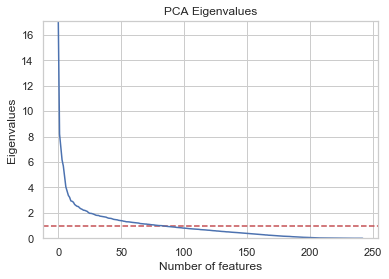

In [69]:
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

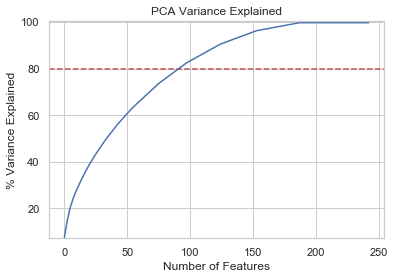

In [70]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [71]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [72]:
pd.DataFrame(data=x)

0         1          2         3         4         5         6  \
0     0.021577 -1.575149   0.001762  1.234067 -2.218971 -2.083496  1.625100   
1    -2.258090 -3.944768   1.958460  0.625268  5.480060  2.137207  4.936184   
2    -3.562127 -0.059657   0.009834 -0.958470  1.561501 -2.894223  1.415209   
3    -2.363641 -3.791238   0.939708  1.645115  2.137748  0.564201 -2.475316   
4    -3.430067 -1.512334   0.326828  1.748242  0.824703 -0.095109 -0.427849   
...        ...       ...        ...       ...       ...       ...       ...   
1163  3.934523 -2.930411  -1.490429  0.369739 -2.377357  0.228728 -1.587170   
1164  4.031039  1.764226  11.523886 -4.354569 -3.798924  0.575765 -0.510069   
1165  0.711798 -0.686675  -1.162789 -1.309530 -2.099132 -6.319459  1.872828   
1166  7.101180  2.563569  -2.224173 -3.063292  1.889509  1.275672 -0.020596   
1167 -3.878476  2.157500  -0.265980 -0.705698 -0.299380 -2.279711  0.578043   

             7         8         9        10        11        12        13  \
0     0.408782  0.406770  2.161865  2.539626 -5.218163  3.723570  2.784698   
1    -0.925692 -2.062219  1.173480  3.175213  3.132922 -2.615446  1.295122   
2    -0.803663  0.715981 -1.296786 -1.493476  0.514560 -1.108279  1.175837   
3     0.997930  1.452469  0.984546  0.732654 -2.479822  2.219528  2.891934   
4     1.899071  0.371427 -0.982109  1.867864  0.298330 -0.082073  0.218753   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.735166  0.529020  0.534178 -1.456310  1.122634 -1.244887  1.644560   
1164 -1.735268 -0.738928 -0.022353  0.012647  2.726787 -0.136014  1.308873   
1165  2.508534  0.726781  3.485318  3.185490 -6.627229  3.269562  1.239910   
1166  0.002800  1.023410 -0.426185  0.353453  0.593494  1.009808  2.113857   
1167 -2.120655 -0.866551 -0.738912 -0.009056 -0.146269 -0.711432 -0.901600   

            14        15        16        17        18        19        20  \
0     1.291138 -3.142474 -0.902221  0.244609  3.475922  0.285223 -2.612933   
1    -3.908421  3.700394 -1.601725  1.999434  1.113153 -0.476183 -2.338458   
2    -0.462083 -1.997673 -0.489549 -0.822500 -1.509331  0.604287  1.443588   
3     0.076758 -0.549149 -0.497825 -0.161107  0.442984 -1.027036 -0.186260   
4     3.946656 -1.162221 -1.173990 -0.799763 -0.581898 -0.963802  2.100008   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -1.051305 -0.611610 -0.031873  0.639273  1.344443 -0.396451  1.583439   
1164  0.858079  0.944357  0.563248 -0.537754  0.130542  0.914645  0.141927   
1165  1.192761 -3.898770  0.211921  0.937112  7.214941  1.800413 -1.236810   
1166  0.041241 -2.149388  2.100278  1.809361 -0.367331 -0.283461 -0.466742   
1167  0.385008 -1.406902  0.801040  0.097354  0.439523  1.724040  0.095148   

            21        22        23        24        25        26        27  \
0    -0.550835  0.250531 -0.834084 -0.589889  0.219244 -1.843842 -2.037449   
1    -0.908340 -1.803957  3.168941  1.411815 -1.307470  2.229589 -0.324309   
2    -2.539186  0.378554 -1.538907  0.419590  1.377422  0.744203 -1.466887   
3     0.143432 -1.034163 -1.011406  0.539347 -0.829834  0.385347 -1.599392   
4     0.235141 -3.477625 -0.019049  1.300578  0.438072  0.571809 -1.726166   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.581914 -1.242363 -0.910293  1.351638  1.456107  0.805089  0.305882   
1164  0.019748 -0.851658 -0.243540 -0.725436  0.115023 -0.603178  0.266358   
1165 -3.804948  2.630149  0.460479 -0.385193  3.251476 -3.509303 -4.193503   
1166 -2.651339  4.185350  6.985538  4.133029  0.653312 -0.843586  1.926021   
1167 -0.253675  0.109888 -0.265915 -0.176733 -0.448126 -0.274399  0.508089   

            28        29        30        31        32        33        34  \
0     0.381521  0.521796 -0.576192  0.660157 -0.310436  0.839030  1.445112   
1    -0.401836  2.786379  2.900280  1.514650  2.532488  1.916938 -0.020784   
2    -0.192240 -0.8

In [73]:
#finding the best random state
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 54 is 0.8434889594430869


In [74]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

# Model Training

In [75]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

In [76]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('********************************************************************************************')
    print('\n')

score of LinearRegression() is: 0.8146496547638835
Error:
Mean absolute error: 22009.396984317325
Mean squared error: 1027035957.4715276
Root Mean Squared Error: 32047.401727308996
r2_score: 0.8434889594430869
********************************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 35376.54700854701
Mean squared error: 2861284429.8461537
Root Mean Squared Error: 53490.97521868669
r2_score: 0.5639659934136918
********************************************************************************************


score of KNeighborsRegressor() is: 0.7887726720994674
Error:
Mean absolute error: 27491.222222222223
Mean squared error: 1692452846.4437609
Root Mean Squared Error: 41139.43177103642
r2_score: 0.7420854117488229
********************************************************************************************


score of SVR() is: -0.04563783090094797
Error:
Mean absolute error: 58255.22553364024
Mean squa

# Cross Validation

In [77]:
#Cross validating all algorithms by using for loop

models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.84115369 0.72888564 0.80888671 0.68040969 0.7905187  0.67735846
 0.79953399 0.6202805  0.66637002 0.82587239]
Mean score: 0.7439269799875479
Standard deviation: 0.07459649227525474
****************************************************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.54702618 0.48268489 0.62657724 0.39665538 0.62022936 0.5236713
 0.66783148 0.70767653 0.61247371 0.55807488]
Mean score: 0.5742900964067964
Standard deviation: 0.08738329607414394
****************************************************************************************************************************************************


Model: KNeighborsRegressor()
Score: [0.76586588 0.68366626 0.74340066 0.7129317  0.70016119 0.55259964
 0.76868605 0.76069791 0.76171512 0.69266044]
Mean score: 0.7142384852273687
Standard deviation: 0.06214509871776752
****************************************

# Ridge Regressor is giving us minimum Rmse score so we choose it as our final model.

# Hyperparameter tuning

In [78]:
#Using GridSearchCV to find the best paarameters in Ridge Regressor

from sklearn.model_selection import GridSearchCV

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [79]:
#using Ridge Regressor with its best parameters

RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.8146116507013653


Mean absolute error: 21864.740616040686
Mean squared error: 1022753101.1332718
Root Mean Squared error: 31980.5112706672


r2_score: 0.8441416282198515




In [80]:
#Cross validating Ridge

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.84246321 0.73228352 0.8111118  0.68270414 0.79300065 0.6804552
 0.80404716 0.64574331 0.68060143 0.83080418]
Mean Score: 0.7503214608482237
Standard deviation: 0.06996230082765485


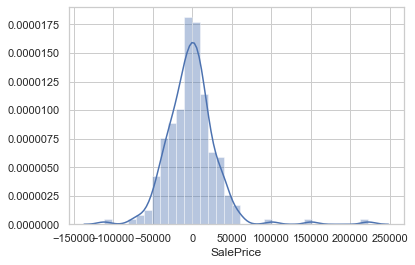

In [81]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

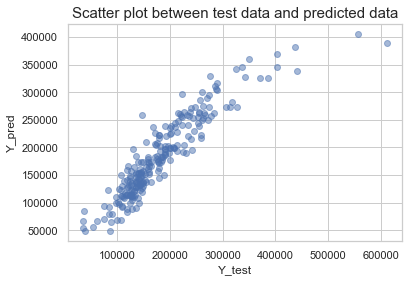

In [82]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

# Now we test our test dataset

In [83]:
#loading the dataset
df_test=pd.read_csv("test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

# Making all the changes as we made on our training dataset

In [84]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
df_test[columns] = df_test[columns].fillna('NA')

In [85]:
#filling missing values in MasVnrType with None
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

In [86]:
#filling missing values in GarageYrBlt with 0
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna('0')

In [87]:
#Imputing the missing values with their median

df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(),inplace=True)

In [88]:
#Encoding categorical columns
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

df_test = pd.get_dummies(df_test, columns = categorical_colss, drop_first=True)

In [89]:
df_test.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [90]:
df_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            2006       200.0        1249           0        673         1922   
1            1984         0.0        1036           0        184         1220   
2            2001         0.0           0           0       1753         1753   
3            1950         0.0         275           0        429          704   
4            2007        74.0           0           0        894          894   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        1922         0             0       1922             1             0   
1        1360         0             0       1360             1             0   
2        1788         0             0       1788             0             0   
3         860       704             0       1564             0             0   
4         894      1039             0       1933             0             0   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             3             1             8           1   
1           1         0             1             1             4           1   
2           2         0             3             1             7           1   
3           1         1             3             1             7           1   
4           2         1             4             1             9           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2005           3         676         178           51   
1          1984          

In [91]:
df_cap=df_test.copy()

In [92]:
def percentile_capping(df_test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df_test[col], limits=(from_low_end, from_high_end), inplace=True)

In [93]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [94]:
percentile_capping(df_cap, features, 0.01, 0.10)

In [95]:
df_cap.shape

(292, 213)

In [96]:
#Scaling input variables

sc=StandardScaler()
x1=sc.fit_transform(df_test)
x1=pd.DataFrame(x1,columns=df_test.columns)

In [97]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

In [98]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [99]:
pd.DataFrame(data=x1)

0         1         2         3         4         5         6  \
0   -7.230157  2.222011  1.496484  4.043805 -1.655639 -0.938563  1.229618   
1   -3.072242 -0.239101  0.445989 -0.207622 -2.681405  2.294892  0.164982   
2   -4.352944  1.294936 -0.698007  0.687803 -1.170315 -1.543662 -1.602387   
3    2.364058 -1.528634  0.738506  0.329316  3.287338 -1.342443  0.537068   
4   -4.680780  2.076735 -1.818632 -0.837280  3.532847 -1.361782  0.684049   
..        ...       ...       ...       ...       ...       ...       ...   
287 -5.088818  1.288022 -0.952124  0.164966 -1.297198 -1.665925 -0.964441   
288 -0.163327 -0.632468 -0.353900 -1.653287 -2.521442 -0.312983  0.007369   
289  0.975206 -2.648628  2.088382  0.749168 -1.112006  0.604258 -0.894954   
290  2.728598 -1.949752 -0.625144 -0.841542  2.141371 -0.728874  2.233374   
291  3.768191 -2.646545 -0.785820 -5.308845  1.306190  3.236218  1.069471   

            7         8         9        10        11        12        13  \
0   -0.832792 -0.930155  1.453895  1.732049 -2.409918  0.140064 -0.367026   
1   -1.183889 -0.636800  1.014300  1.255976 -0.423491  1.615218  2.333984   
2    1.987478  0.499538 -0.524646 -0.448051  0.401829  0.769327 -0.054876   
3   -1.117912 -1.383874  1.915644  0.147852  1.439666 -2.265302 -0.679915   
4    1.214704  0.471511 -0.417898  0.244754 -0.343047 -0.323500 -1.356812   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.188912  0.089998 -0.857465 -0.941931  1.028176  0.394199 -0.809359   
288  2.832698 -0.715647 -0.503165  0.214013 -1.481427 -2.081515  0.016687   
289  0.607123 -2.172489  0.161085  0.205123 -0.012552  0.951126  0.723235   
290 -2.913802  1.798795  0.819127  2.276241 -0.285591  1.381616 -3.440417   
291 -3.256347 -1.592740  0.824843 -1.243071 -1.733503  0.918311  3.615436   

           14        15        16        17        18        19        20  \
0   -0.814065  0.407617 -1.690971  0.354629 -1.051802  0.622528  1.372926   
1    0.657691 -2.509073 -1.032836 -0.843425  3.171877  1.548481  1.867012   
2    0.106045  0.920133  0.261084  0.408110 -0.205547 -0.330083 -0.540028   
3    1.789731 -0.387989  0.348123 -1.724975 -3.056798  0.648676  1.577302   
4    1.909554 -1.777668 -0.512112 -1.056734 -1.227971  0.935636 -0.159965   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.235323  0.325545  0.628795 -0.458594 -0.133424  0.604868 -0.079315   
288 -0.799443  0.002190 -0.903879 -0.299103 -0.963269 -1.186381  0.214673   
289 -0.230604  1.027945  0.288377 -0.690847  0.893197  0.077104  0.705382   
290  1.070617 -0.428622  1.124744  0.375863 -0.730794  0.469675  0.764436   
291 -2.279395 -0.912520 -1.085194 -0.305981 -1.320108  0.220346 -2.335327   

           21        22        23        24        25        26        27  \
0    1.223724  1.264089 -0.005366  0.848494 -0.540583 -1.736523 -1.241006   
1    0.804674 -1.706532  1.194882  2.679763  0.611713 -0.615734 -0.923142   
2   -1.841833  1.332129  0.849742 -0.197083 -1.312754 -0.338440 -0.189892   
3   -0.444395 -0.374883 -0.042982 -1.765040  0.609361  0.446645 -0.418607   
4    0.653972  0.356912 -1.728224  1.745440  2.027601  0.937935 -0.885103   
..        ...       ...       ...       ...       ...       ...       ...   
287 -1.499832  0.701650  0.416312 -0.346094 -0.072531  0.301612  0.522385   
288  1.985634 -0.311306  0.041975  1.502324 -0.178235  0.426354 -0.585801   
289 -1.091956  0.453456 -0.206436  1.180519  0.810275 -0.399209 -1.661209   
290 -0.995832  3.711432 -3.162205  0.453873 -0.029030  0.821085  0.593882   
291 -0.011230 -0.558970  0.594991 -2.542784  0.569381 -0.772843  1.643735   

           28        29        30        31        32        33        34  \
0    0.735304  0.131705  0.795363  0.485132  0.858931  0.898337  0.040531   
1    1.128289 -0.908327  0.410471 -0.603305  0.050743 -0.559869  2.061150   
2   -0.687818  0.827048 -0.292380 -0.785200  1.109164  0.663557 -0.925596   
3   

In [100]:
#saving our model

import joblib
joblib.dump(RG,'RG_housing_project.pkl')

['RG_housing_project.pkl']

In [101]:
model=joblib.load('RG_housing_project.pkl')

In [102]:
#Testing our model
import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[270896.46249331 176334.40663407 254415.66862121 195193.0558021
 286814.72513365  76469.83859355 155833.54682759 213053.89516257
 217030.18897755 205205.39071944 -18790.71995269 140219.38583016
 154574.38583141 243422.63882467 261150.42936076 180930.69330207
  84336.82630767 139607.55117629 188748.14686308 260944.78311596
 137063.9153634  184836.70595728 179232.66536435  96810.74739637
  94998.50577428 129218.62381555 259498.72849163 162775.5788373
 231256.26094907  69093.54074527 134164.87087446 200902.35032153
 243761.98895509 189267.34996593 101970.77470402 241575.48555062
 245416.67450759 112045.45049267 213532.7402772  134734.69863799
 113339.80244695 286784.0223584  267658.23449493 214366.5945293
 165386.90025991  94923.92936397 116590.49850176 -50858.63258988
 206230.74049714 210616.02707239 140644.12406113 190631.95532258
 107557.32192362 -10697.33797346 296604.08386254 120614.06846483
 133964.92237805 267962.04231666 263690.13318774 256380.99822573
 108908.3798693  204019.1207